In [129]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image
width = 800; height = 600

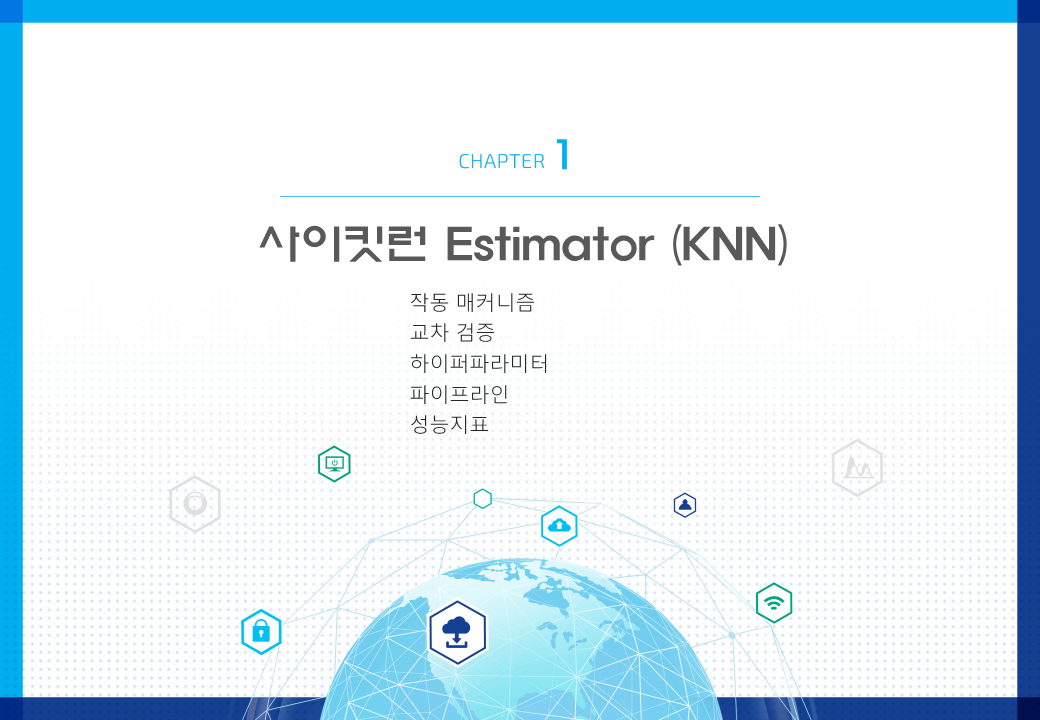

In [130]:
Image(filename='../img/슬라이드22.png', width=width, height=height)

# 1. 작동 매카니즘

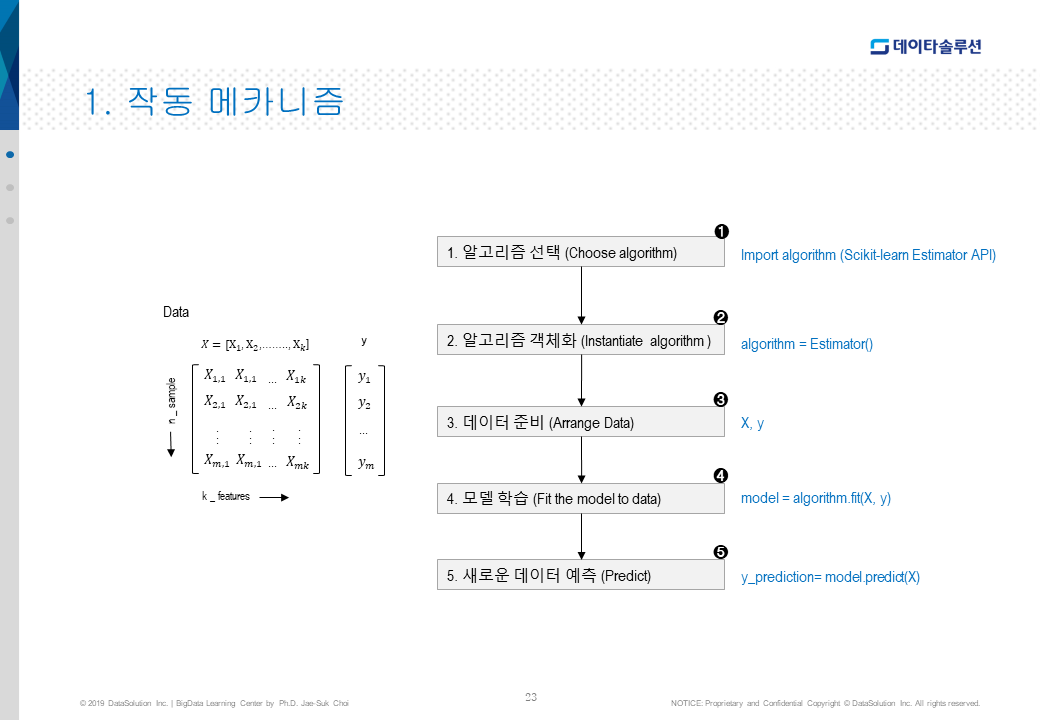

In [131]:
Image(filename='../img/슬라이드23.png', width=width, height=height)

## 전처리가 완료된 소비자데이터 불러오기

In [132]:
df = pd.read_excel('../data/encoded_data.xlsx', index_col=0)

In [133]:
df.head()

성별_1  성별_2  지역_1  지역_2  지역_3  지역_4  지역_5  지역_6  지역_7  직업_1  ...  \
0     1     0     1     0     0     0     0     0     0     0  ...   
1     1     0     1     0     0     0     0     0     0     0  ...   
2     1     0     1     0     0     0     0     0     0     0  ...   
3     1     0     1     0     0     0     0     0     0     0  ...   
4     1     0     1     0     0     0     0     0     0     0  ...   

   드라마_genre_8  드라마_genre_9  드라마_genre_10  드라마_genre_11  드라마_genre_12  \
0          0.0       0.9375         0.875        0.0000         0.000   
1          0.0       0.0000         0.000        0.8750         0.000   
2          0.0       0.0000         0.000        0.0000         0.875   
3          0.0       0.0000         0.000        0.0000         0.000   
4          0.0       0.0000         0.875        0.8125         0.000   

   드라마_genre_13  드라마_genre_14  드라마_genre_15  드라마_genre_16  구매  
0        0.8125        0.0000           0.0           0.0   1  
1        0.0000        0.0000           0.0           0.0   0  
2        0.0000        0.8125           0.0           0.0   1  
3        0.0000        0.0000           0.0           0.0   0  
4        0.0000        0.0000           0.0           0.0   0  

[5 rows x 79 columns]

In [134]:
X = df.drop(['구매'], axis=1)
y = df['구매']

In [135]:
np.random.seed(1357)  # 무작위 시드 발생(예측 결과 동일시) 

In [136]:
from sklearn.neighbors import KNeighborsClassifier   # 1. Estimator API 불러오기
knn = KNeighborsClassifier(n_neighbors=1)            # 2. 알고리즘 객체화(하이퍼파라미터 지정)

In [137]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [138]:
model = knn.fit(X, y)                                # 3. 데이터 학습으로 모델 생성(적합)

In [139]:
y_predict = model.predict(X)                         # 5. 새로운 데이터 분류 예측 (양성, 음성)
y_probas = model.predict_proba(X)                    # 5. 새로운 데이터 예측 확률 (probability(양성))

In [140]:
y_predict
y_probas

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_predict) 

1.0

In [142]:
comparison = y_predict !=  y
np.sum(comparison*1)
np.sum(comparison*1)/X.shape[0]*100
100- (np.sum(comparison*1)/X.shape[0])*100

0

0.0

100.0

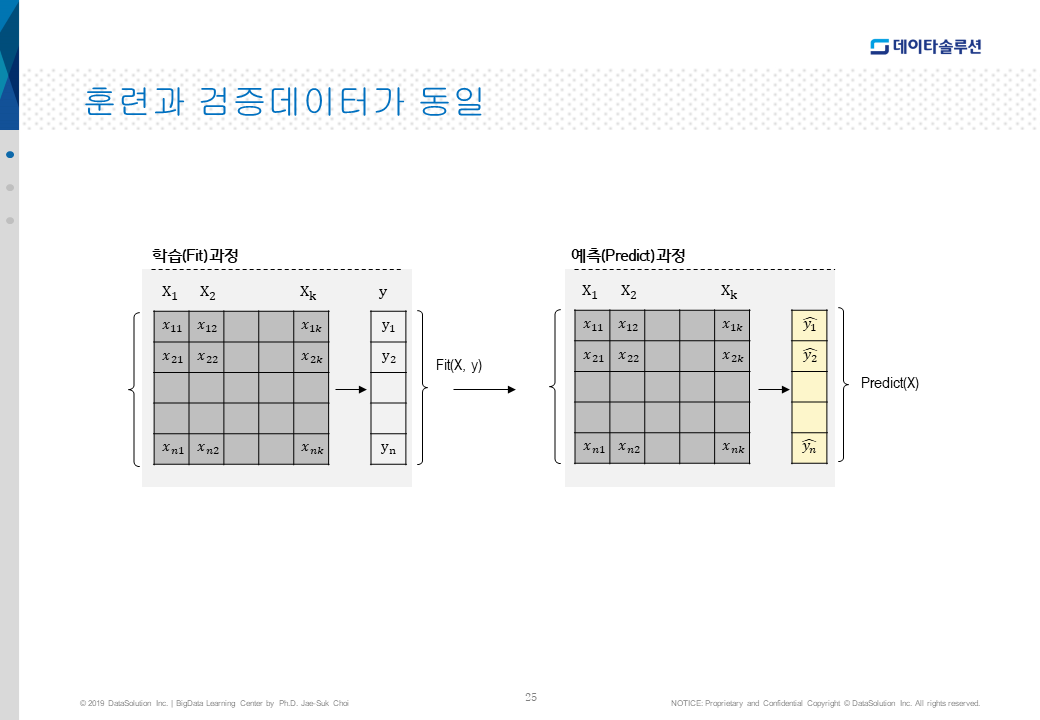

In [143]:
Image(filename='../img/슬라이드25.png', width=width, height=height)

<font color='blue'> 정확도 점수 1.0. 
- 이는 100 %의 점수가 모델에 의해 올바르게 레이블링되었음을 나타낸다.
- 사실,이 접근 방식에는 근본적인 결함이 있는데 동일한 데이터에 대해 모델을 훈련하고 평가하게 되어 매번 100 % 정확도를 얻을 것임..

# 2. 교차 검증 (cross validation)

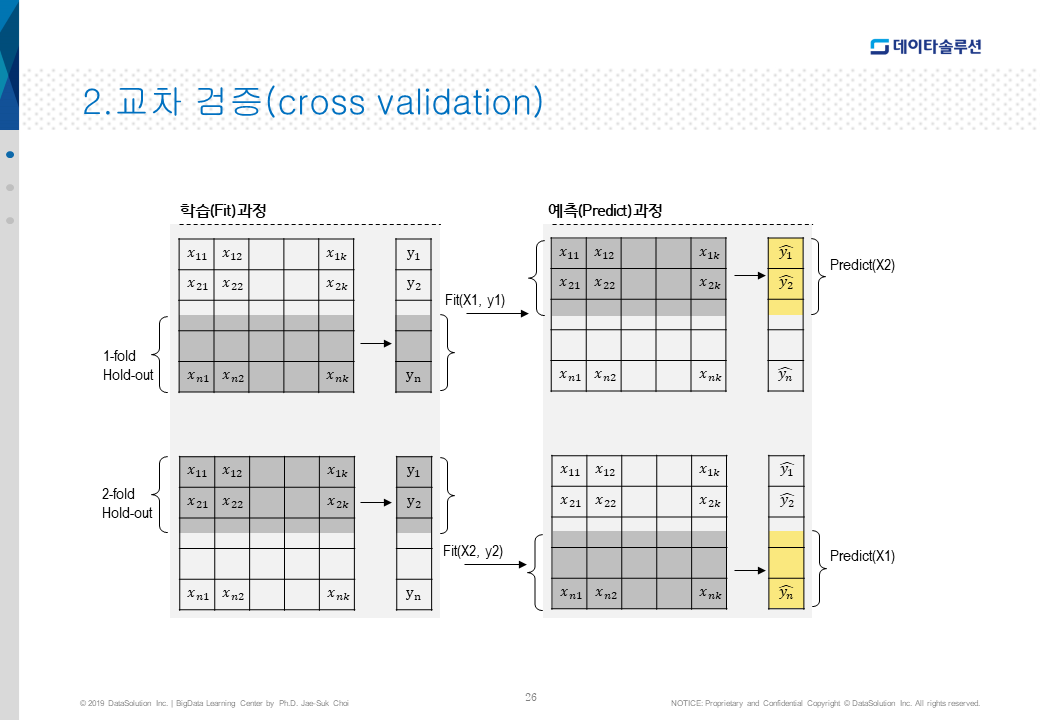

In [144]:
Image(filename='../img/슬라이드26.png', width=width, height=height)

## 2.1 2-folds cross validation

In [145]:
# 1.데이터 준비
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, train_size=0.5, stratify= y, random_state=11)
X1.shape, X2.shape, y1.shape, y2.shape
X1.index, y1.index, X2.index, y2.index
y1.value_counts(normalize=True)
y2.value_counts(normalize=True)

((2000, 78), (2000, 78), (2000,), (2000,))

(Int64Index([2660, 3847, 1236, 1622, 3033, 1765,  857, 3769, 2055, 2072,
             ...
             2388,  141, 2667,  760, 1931, 1227, 3822, 1654, 3919, 2148],
            dtype='int64', length=2000),
 Int64Index([2660, 3847, 1236, 1622, 3033, 1765,  857, 3769, 2055, 2072,
             ...
             2388,  141, 2667,  760, 1931, 1227, 3822, 1654, 3919, 2148],
            dtype='int64', length=2000),
 Int64Index([2414, 1708,  392, 1616,  388,  597, 3509, 1758, 3581,  984,
             ...
             1707, 3855, 1170, 2698, 1896, 2747, 1180, 2981,  939, 1602],
            dtype='int64', length=2000),
 Int64Index([2414, 1708,  392, 1616,  388,  597, 3509, 1758, 3581,  984,
             ...
             1707, 3855, 1170, 2698, 1896, 2747, 1180, 2981,  939, 1602],
            dtype='int64', length=2000))

0    0.653
1    0.347
Name: 구매, dtype: float64

0    0.6525
1    0.3475
Name: 구매, dtype: float64

In [146]:
model = KNeighborsClassifier()            # 2. 알고리즘 객체화(하이퍼파라미터 디폴트)

In [147]:
model.fit(X1,y1)                         # 3. Fit 알고리즘 to Data (학습, fit, learning)
model.score(X2, y2).round(4)

model.fit(X2,y2)
model.score(X1, y1).round(4)

KNeighborsClassifier()

0.673

KNeighborsClassifier()

0.6615

In [148]:
from sklearn.metrics import accuracy_score
y2_predict = model.fit(X1, y1).predict(X2)
y1_predict = model.fit(X2, y2).predict(X1)
accuracy_score(y2, y2_predict).round(4)
accuracy_score(y1, y1_predict).round(4)

0.673

0.6615

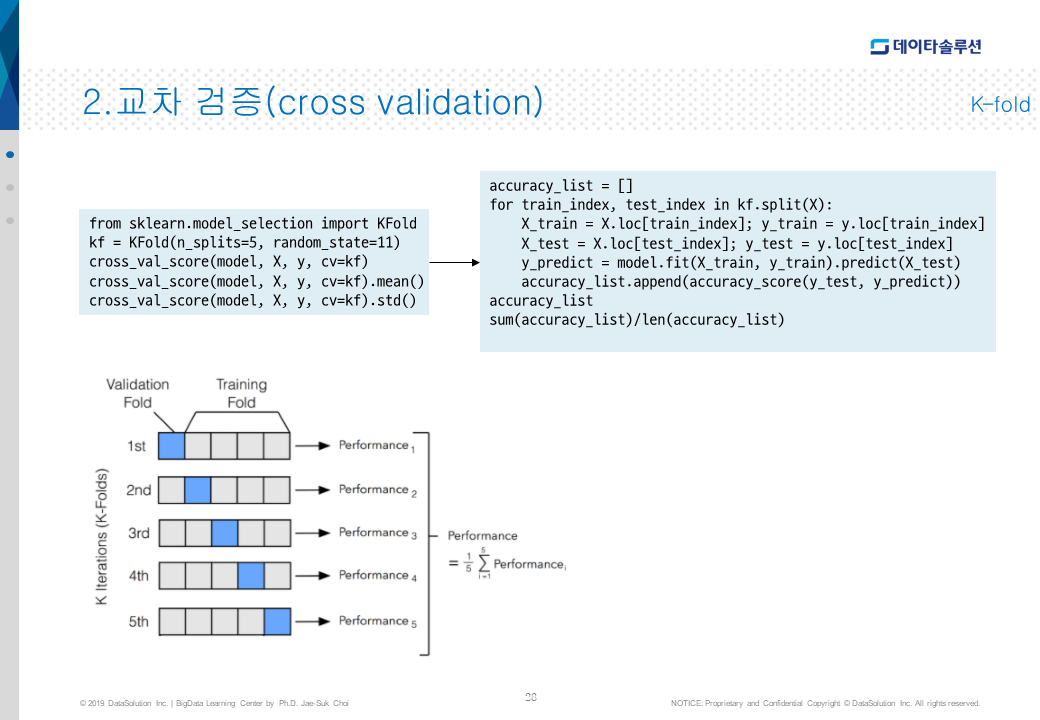

In [149]:
Image(filename='../img/슬라이드28.png', width=width, height=height)

In [150]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.645  , 0.67125, 0.62625, 0.615  , 0.67   ])

In [151]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=11)
cross_val_score(model, X, y, cv=kf)
cross_val_score(model, X, y, cv=kf).mean()
cross_val_score(model, X, y, cv=kf).std()

array([0.645 , 0.6425, 0.645 , 0.665 , 0.655 ])

0.6505000000000001

0.008426149773176376

In [152]:
accuracy_list = []
for train_index, test_index in kf.split(X):
    X_train = X.loc[train_index]; y_train = y.loc[train_index]
    X_test = X.loc[test_index]; y_test = y.loc[test_index]    
    y_predict = model.fit(X_train, y_train).predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_predict))
accuracy_list
sum(accuracy_list)/len(accuracy_list)

[0.645, 0.6425, 0.645, 0.665, 0.655]

0.6505000000000001

## 3. 예측 모델 성능지표(performance index)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify= y, random_state=11)
X_train.shape, y_train.shape
X_test.shape, y_test.shape
model.fit(X_train, y_train)

((3200, 78), (3200,))

((800, 78), (800,))

KNeighborsClassifier()

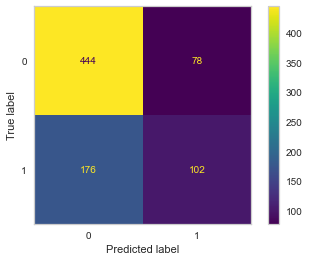

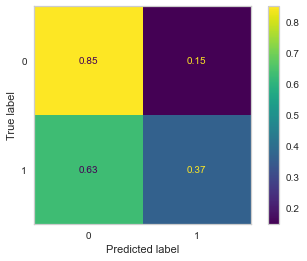

In [154]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plot_confusion_matrix(model, X_test, y_test, normalize='true')

In [155]:
444/(444+78)

0.8505747126436781

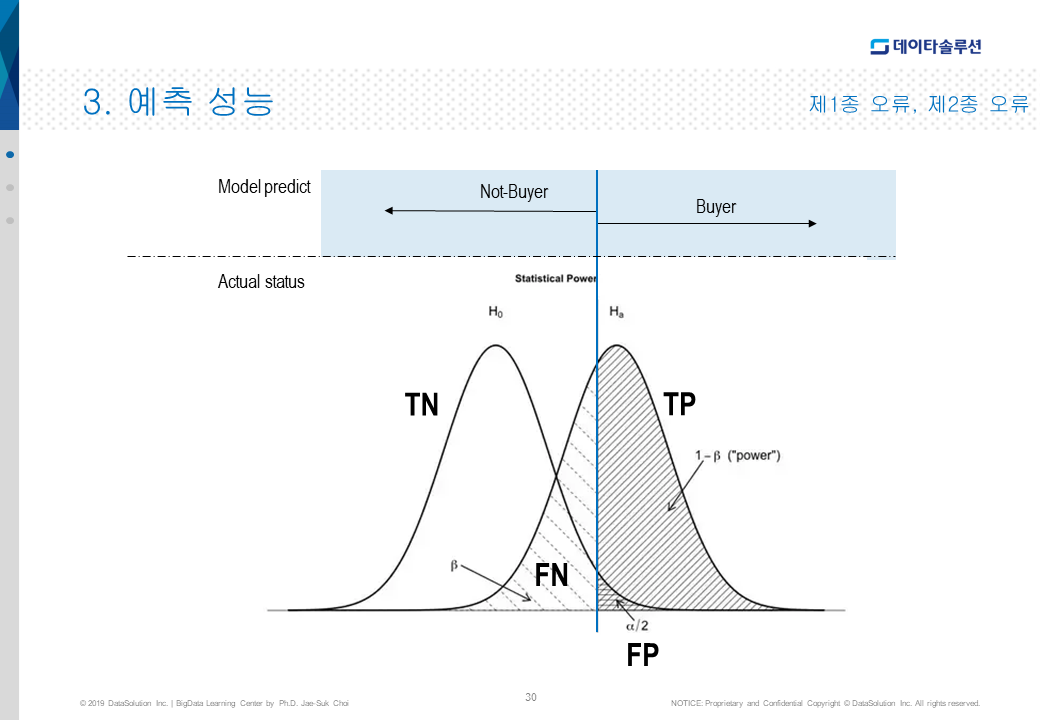

In [156]:
Image(filename='../img/슬라이드30.png', width=width, height=height)

In [157]:
from sklearn.metrics import classification_report
y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       522
           1       0.57      0.37      0.45       278

    accuracy                           0.68       800
   macro avg       0.64      0.61      0.61       800
weighted avg       0.66      0.68      0.66       800



In [158]:
print(f'모델의 정확도(accuracy)는 {(444+ 102)/800}')
print(f' 양성기준, 정밀도는 {102/(78+102)} 재현율은 {102/(176+102)}')
print(f'  양성기준, f1-score는 {2*0.57*0.37/(0.57+0.37)}')
print(f'   모델의 recall_macro avg는 {(0.85+0.37)/2}')
print(f'    모델의 recall_weighted avg는 {(0.85*522+0.37*278)/800}')

모델의 정확도(accuracy)는 0.6825
 양성기준, 정밀도는 0.5666666666666667 재현율은 0.3669064748201439
  양성기준, f1-score는 0.44872340425531915
   모델의 recall_macro avg는 0.61
    모델의 recall_weighted avg는 0.6831999999999999


# <font color='red'> 실습_01
### 1. 5겹 교차검증으로 평균 정확도 확인
### 2. 허위양성율, 허위음성율 --> Confusion matrix 확인
### 3. 생존여부에 대한 재현율, 정밀도, f1-score확인/

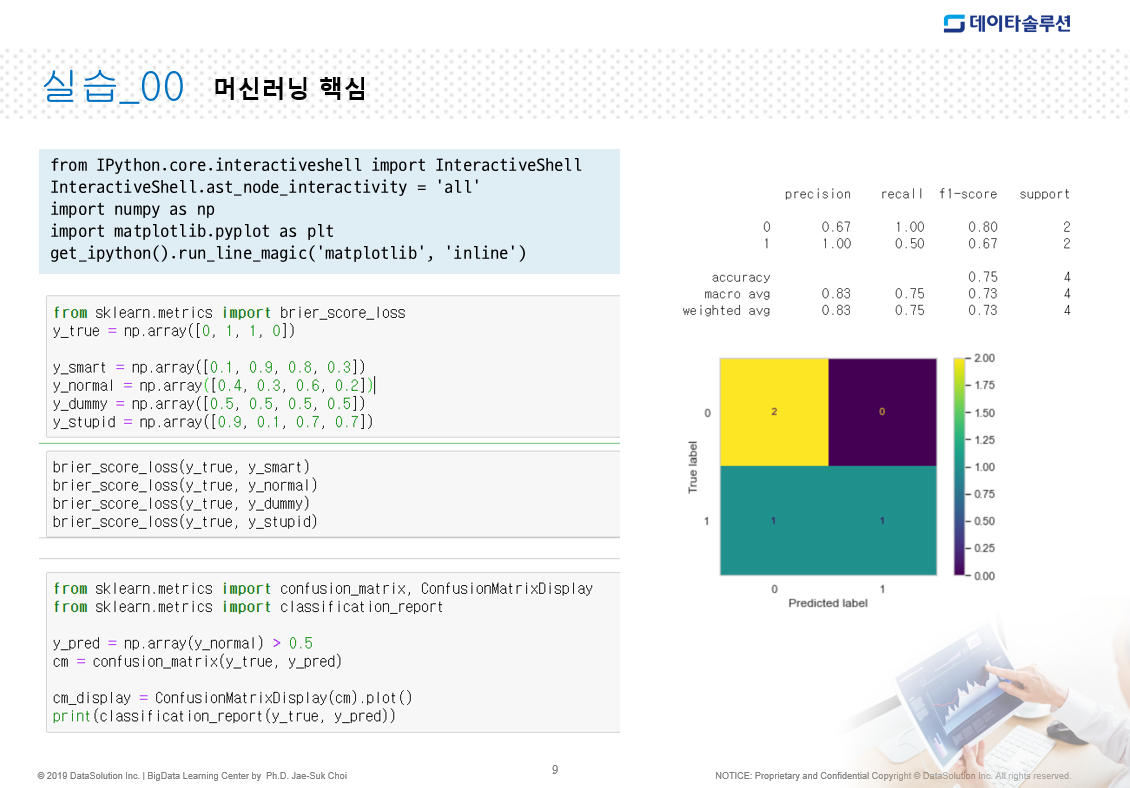

In [159]:
Image(filename='../img/실습00.png', width=width, height=height)

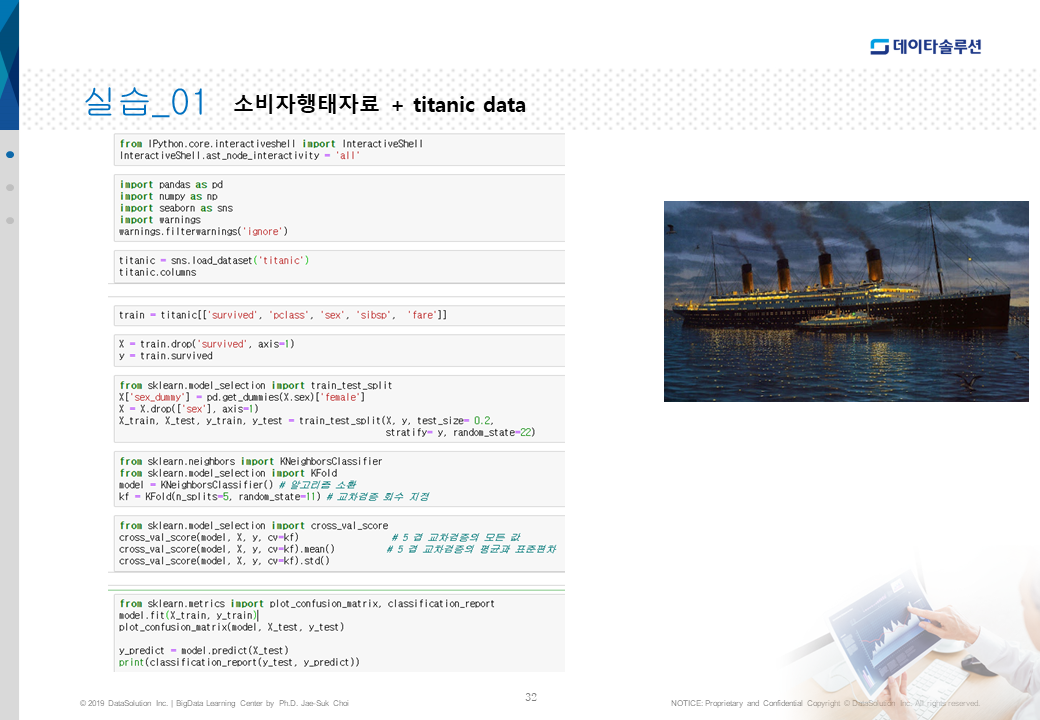

In [160]:
Image(filename='../img/슬라이드32.png', width=width, height=height)

## 모델과 하이퍼파라미터(Hyperparameter)

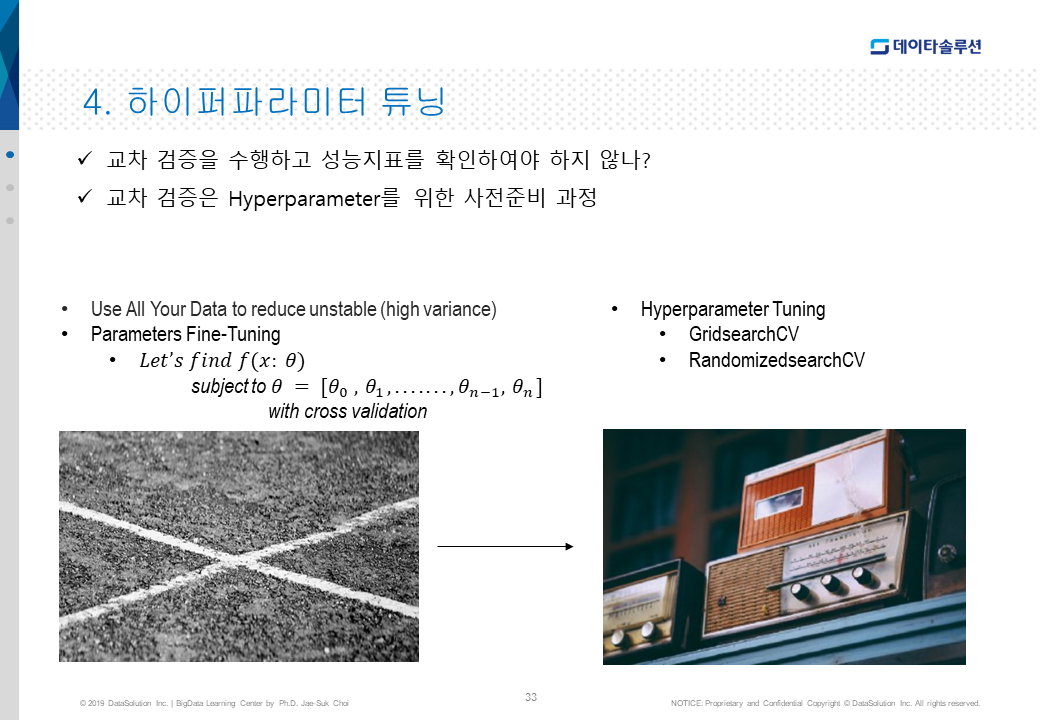

In [161]:
Image(filename='../img/슬라이드33.png', width=width, height=height)

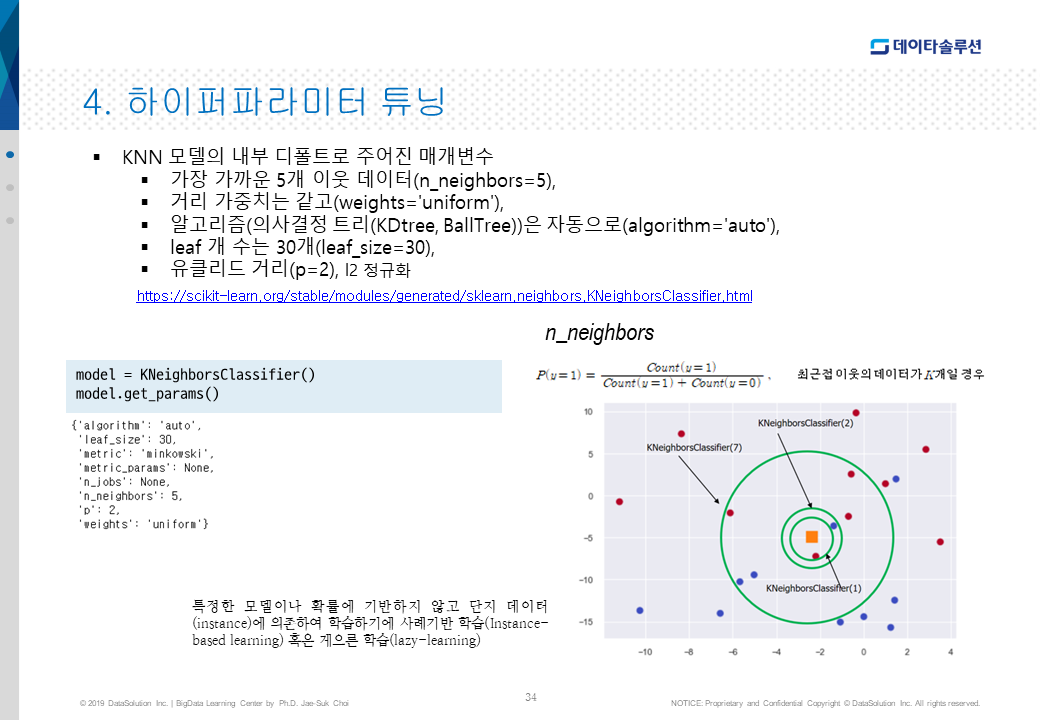

In [162]:
Image(filename='../img/슬라이드34.png', width=width, height=height)

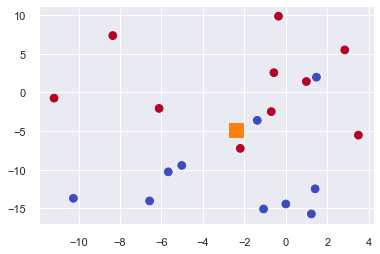

In [163]:
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(20, 2, centers=2, random_state=2, cluster_std=5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap='coolwarm')
plt.scatter(X[:, 0].mean(), X[:, 1].mean(), color = '#ff7f0e', s=200, marker='s')

K nearest 데이터 2개

In [164]:
Xmean = np.array([X[:, 0].mean(), X[:, 1].mean()])
Xnew = Xmean[np.newaxis, :]
model = KNeighborsClassifier(2)                    
y_predict = model.fit(X, y).predict(X)
model.fit(X, y).predict(Xnew)
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([0])

정확도(Accuracy): 75.00%


K nearest 데이터 7개

In [165]:
model = KNeighborsClassifier(7)                     
y_predict = model.fit(X, y).predict(X)
model.fit(X, y).predict(Xnew)
print('정확도(Accuracy): {0:.2f}%'.format(accuracy_score(y, y_predict)*100))

array([1])

정확도(Accuracy): 85.00%


In [166]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

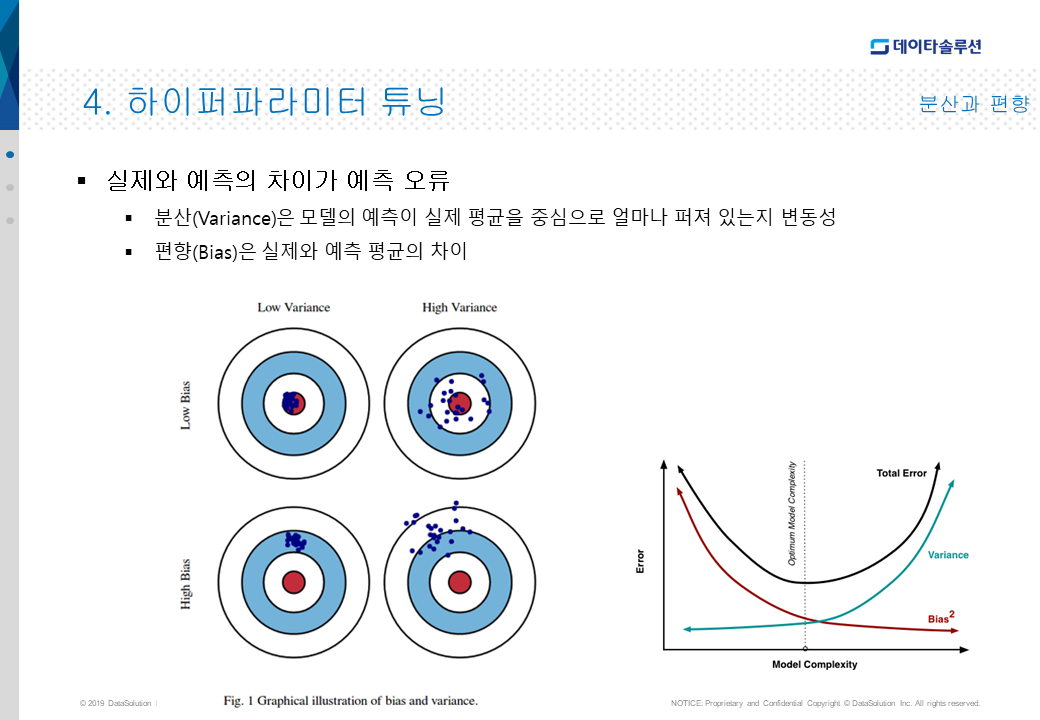

In [167]:
Image(filename='../img/슬라이드35.png', width=width, height=height)

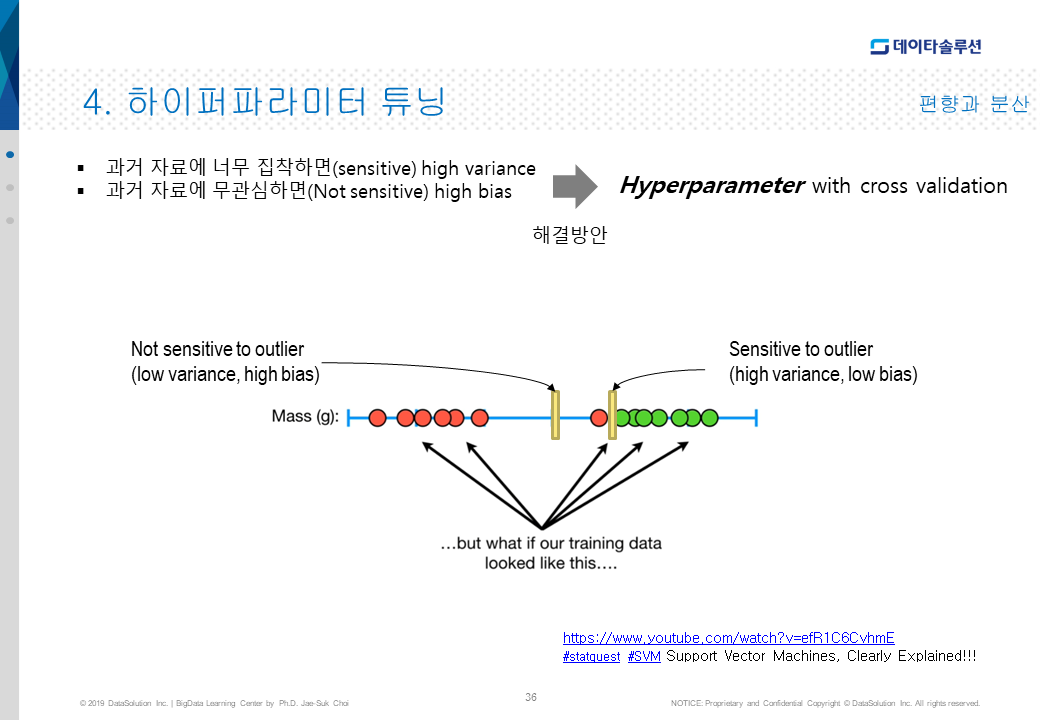

In [168]:
Image(filename='../img/슬라이드36.png', width=width, height=height)

사이킷런 KNN 모델의 내부 디폴트로 주어진 매개변수 https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  는 가장 가까운 5개 이웃 데이터(n_neighbors=5), 거리 가중치는 같고(weights='uniform'), 알고리즘은 자동으로(algorithm='auto'), leaf 개 수는 30개(leaf_size=30), 유클리드 거리(p=2) 등으로 설정되어 있다. KNN 내부 알고리즘은 의사결정 트리(KDtree, BallTree)를 사용하기 때문에 의사결정 트리의 최종단계인 leaf의 개수를 하이퍼파라미터로 한다.

# 4. Hyperparameter tuning

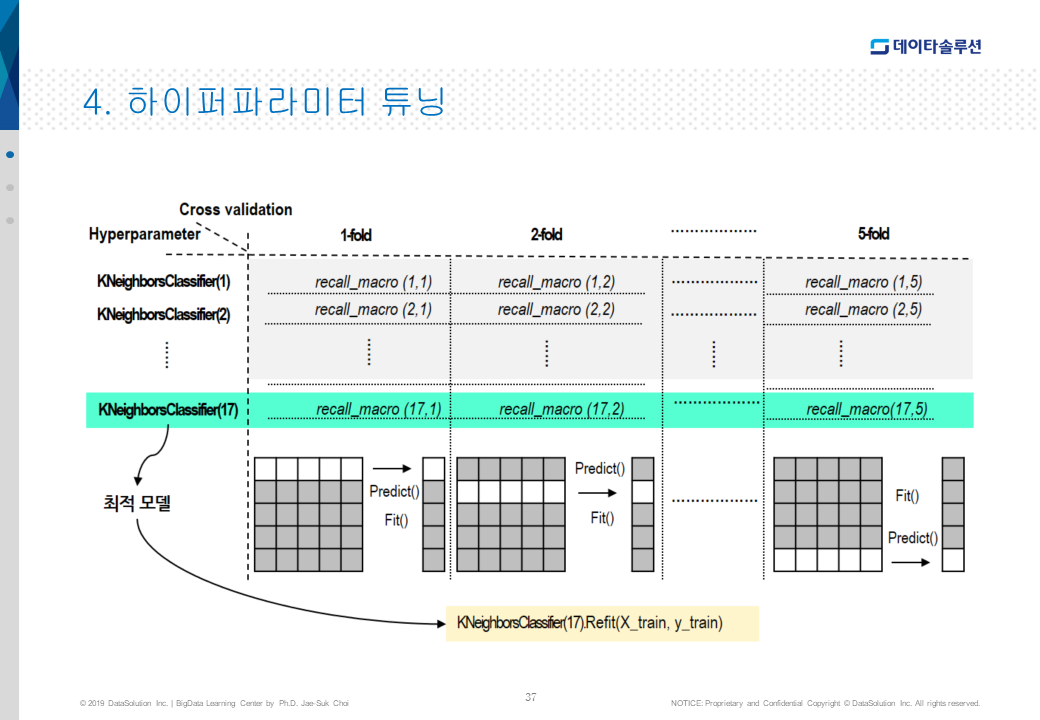

In [169]:
Image(filename='../img/슬라이드37.png', width=width, height=height)

## 4.1 gridsearch

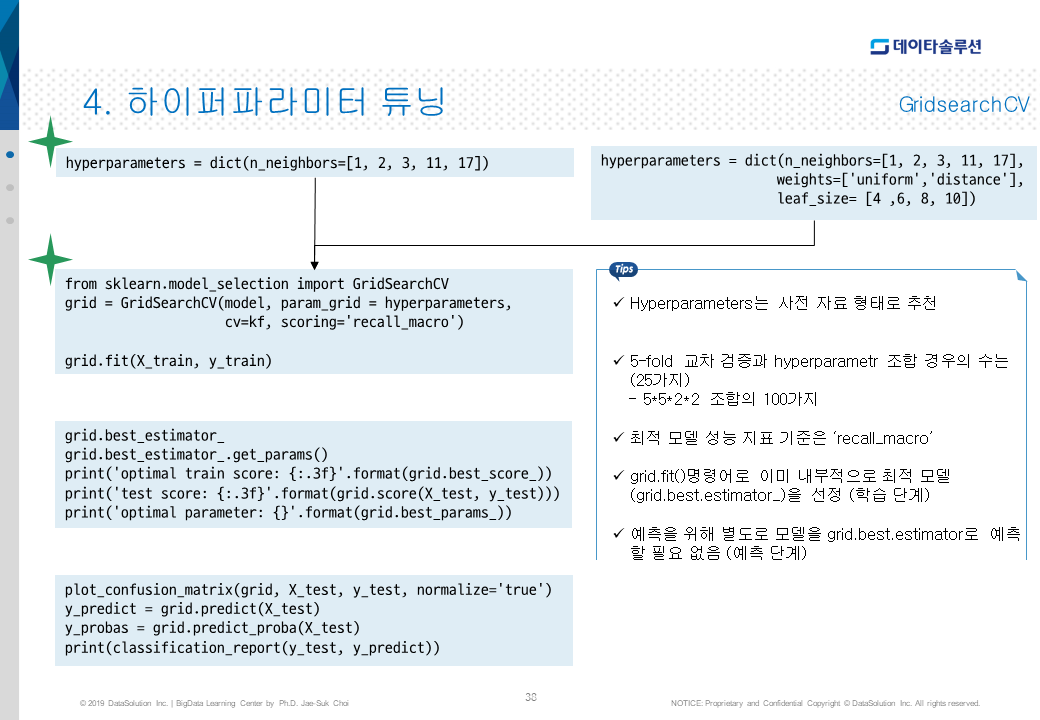

In [170]:
Image(filename='../img/슬라이드38.png', width=width, height=height)

In [171]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### 최근접이웃 데이터만 튜닝

In [172]:
hyperparameters = dict(n_neighbors=[1, 2, 3, 11, 17])
hyperparameters = {'n_neighbors': [1, 2, 3, 11, 17]}
hyperparameters = {'n_neighbors': (1, 2, 3, 11, 17)}
hyperparameters

{'n_neighbors': (1, 2, 3, 11, 17)}

In [173]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [174]:
# 데이터 준비
X = df.drop(['구매'], axis=1)
y = df['구매']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify= y, random_state=11)

In [175]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid = hyperparameters,
                    cv=kf, verbose = True, scoring='accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.1s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (1, 2, 3, 11, 17)}, scoring='accuracy',
             verbose=True)

In [176]:
grid.best_estimator_
grid.best_estimator_.get_params()

KNeighborsClassifier(n_neighbors=17)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

In [177]:
#grid?

In [178]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.683
test score: 0.704
optimal parameter: {'n_neighbors': 17}


In [179]:
y_predict = grid.predict(X_test)
y_probas = grid.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       522
           1       0.67      0.29      0.41       278

    accuracy                           0.70       800
   macro avg       0.69      0.61      0.60       800
weighted avg       0.70      0.70      0.66       800



### 최근접이웃, 거리비중, leaf size 등 동시 튜닝 데이터만 튜닝

In [180]:
hyperparameters = dict(n_neighbors=[3, 11, 17, 25],
                      weights=['uniform','distance'],
                      leaf_size= [4 ,6, 8, 10])
hyperparameters

{'n_neighbors': [3, 11, 17, 25],
 'weights': ['uniform', 'distance'],
 'leaf_size': [4, 6, 8, 10]}

In [181]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid = hyperparameters,
                    cv=kf, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [4, 6, 8, 10],
                         'n_neighbors': [3, 11, 17, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [182]:
grid.best_estimator_
grid.best_estimator_.get_params()

KNeighborsClassifier(leaf_size=4, n_neighbors=25, weights='distance')

{'algorithm': 'auto',
 'leaf_size': 4,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 25,
 'p': 2,
 'weights': 'distance'}

In [183]:
print('optimal train score: {:.3f}'.format(grid.best_score_))
print('test score: {:.3f}'.format(grid.score(X_test, y_test)))
print('optimal parameter: {}'.format(grid.best_params_))

optimal train score: 0.691
test score: 0.696
optimal parameter: {'leaf_size': 4, 'n_neighbors': 25, 'weights': 'distance'}


In [184]:
y_predict = grid.predict(X_test)
y_probas = grid.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80       522
           1       0.71      0.22      0.33       278

    accuracy                           0.70       800
   macro avg       0.70      0.58      0.57       800
weighted avg       0.70      0.70      0.64       800



## 4.2 randomizedsearch

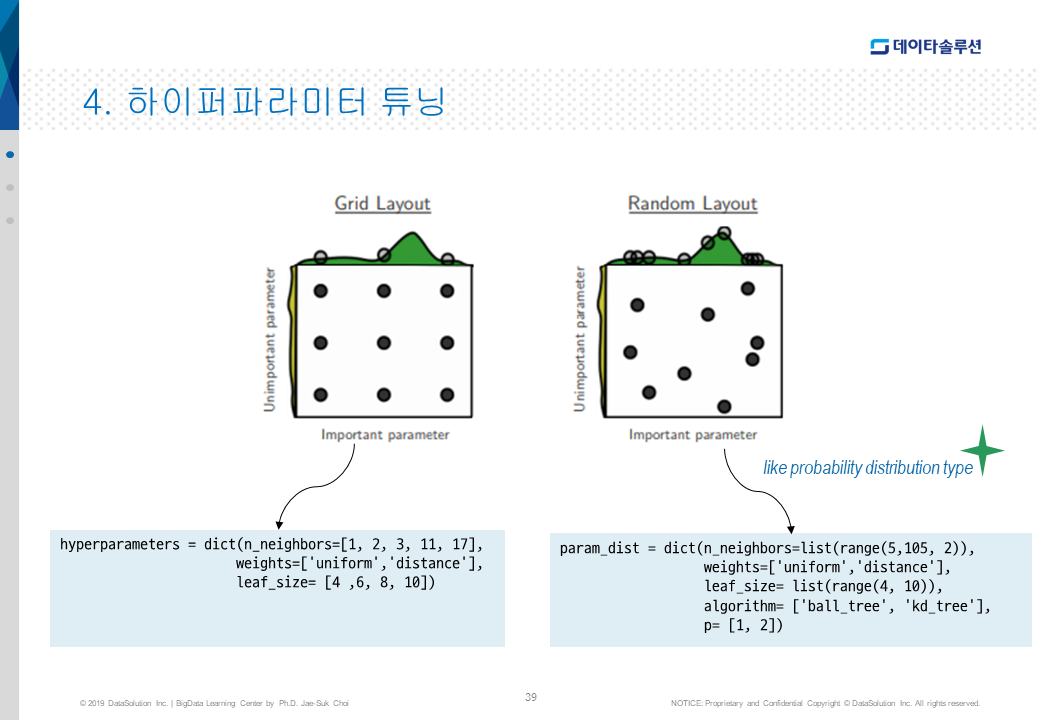

In [185]:
Image(filename='../img/슬라이드39.png', width=width, height=height)

In [186]:
param_dist = dict(n_neighbors=list(range(5,105, 2)),
                  weights=['uniform','distance'],
                  leaf_size= list(range(4, 40)),
                  algorithm= ['auto', 'ball_tree', 'kd_tree'],
                  metric = ['manhattan'],
                  p= [1, 2])

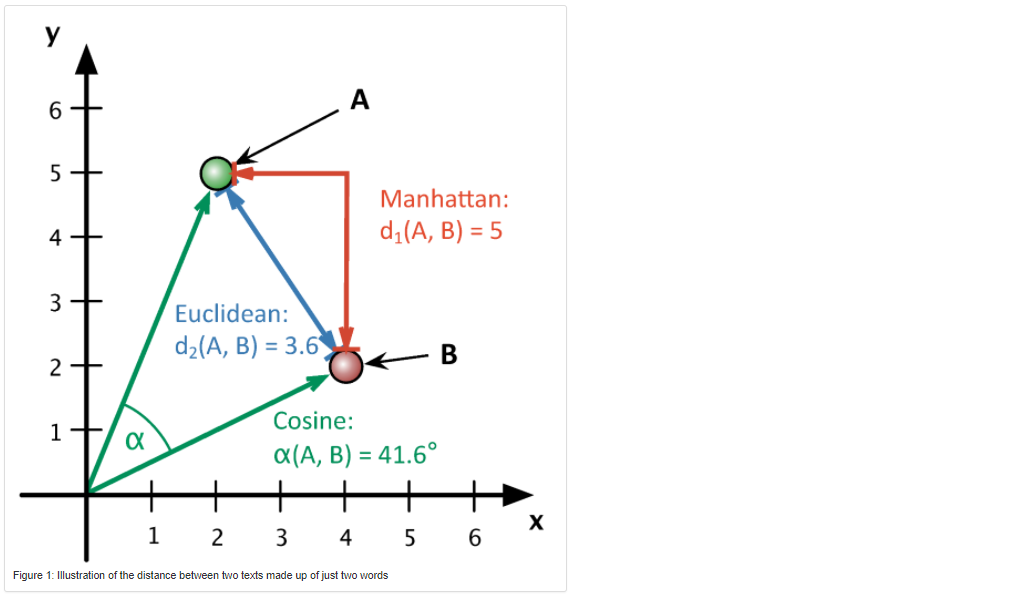

In [187]:
Image(filename='../img/distance.png', width=width, height=height)

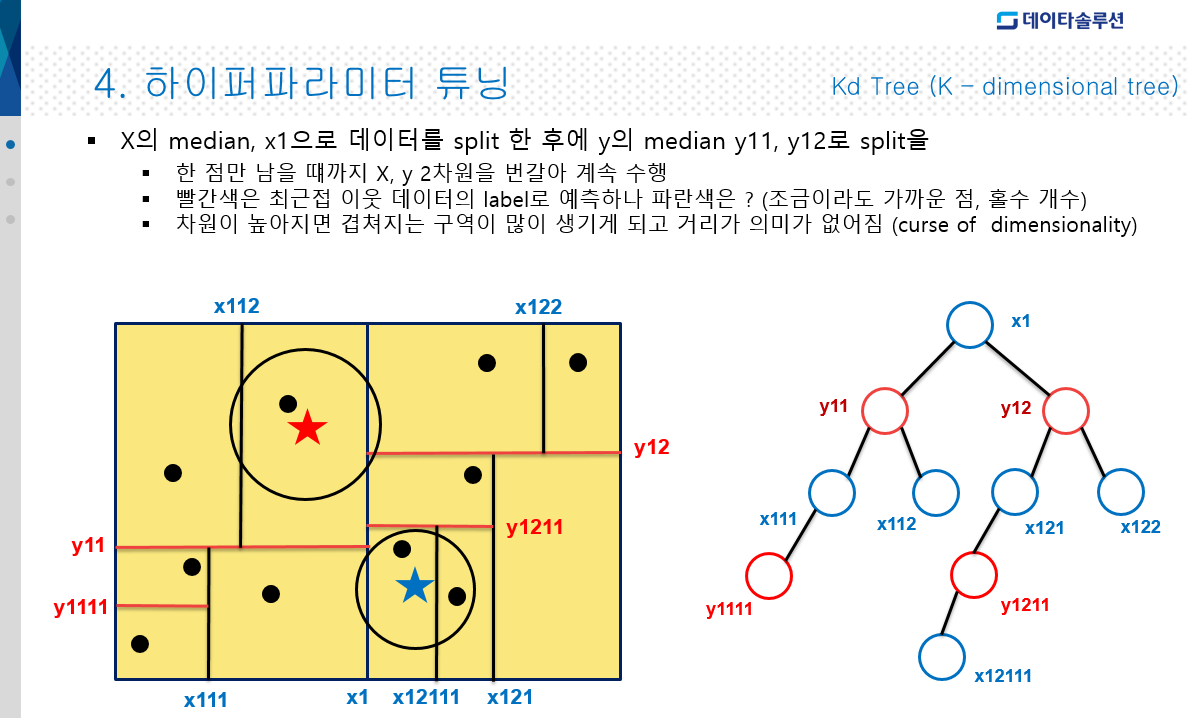

In [188]:
Image(filename='../img/kdtree.png', width=width, height=height)

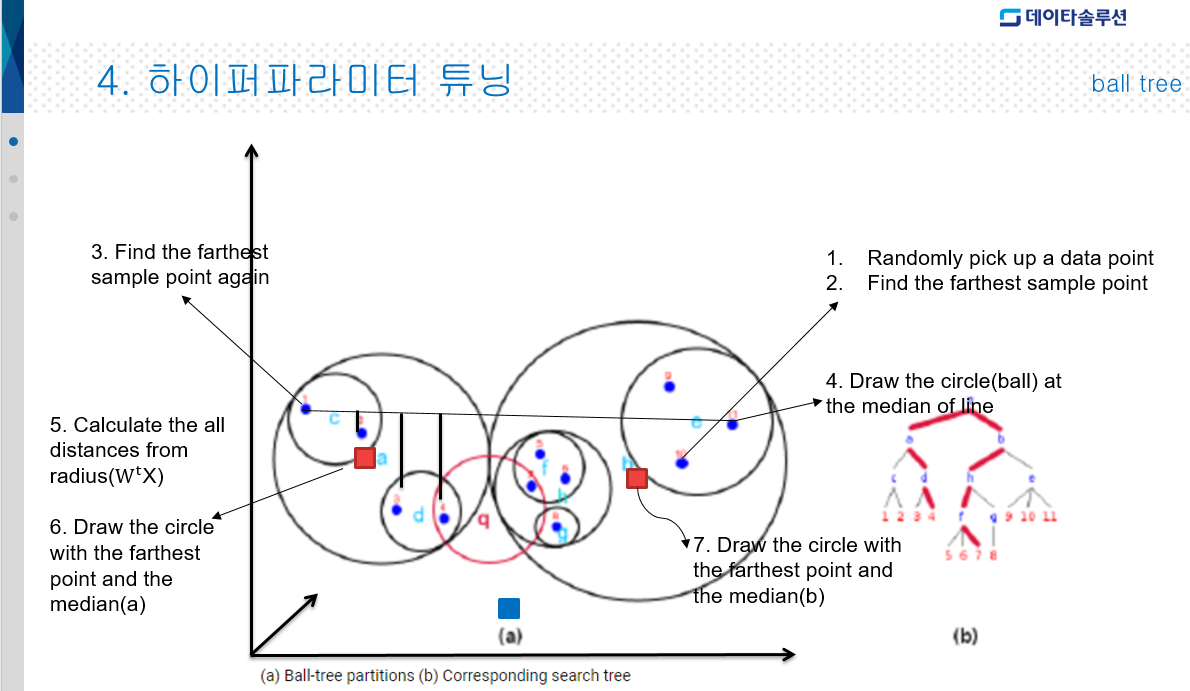

In [189]:
Image(filename='../img/balltree.png', width=width, height=height)

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [191]:
rs = RandomizedSearchCV(model, param_distributions= param_dist, cv=kf,
                        n_iter=30, verbose=True, scoring='accuracy')
rs.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.2s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=30,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': [4, 5, 6, 7, 8, 9, 10, 11,
                                                      12, 13, 14, 15, 16, 17,
                                                      18, 19, 20, 21, 22, 23,
                                                      24, 25, 26, 27, 28, 29,
                                                      30, 31, 32, 33, ...],
                                        'metric': ['manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19, 21, 23, 25, 27, 29,
                                                        31, 33, 35, 37, 39, 41,
                                                        43, 45, 47, 49, 51, 53,
                                                        55, 57, 59, 61, 63, ...],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=True)

In [192]:
print('optimal train score: {:.3f}'.format(rs.best_score_))
print('optimal test score: {:.3f}'.format(rs.score(X_test, y_test)))
print('optimal parameter: {}'.format(rs.best_params_))

optimal train score: 0.693
optimal test score: 0.710
optimal parameter: {'weights': 'distance', 'p': 1, 'n_neighbors': 27, 'metric': 'manhattan', 'leaf_size': 35, 'algorithm': 'kd_tree'}


In [193]:
y_predict = rs.predict(X_test)
y_probas = rs.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       522
           1       0.75      0.25      0.37       278

    accuracy                           0.71       800
   macro avg       0.73      0.60      0.59       800
weighted avg       0.72      0.71      0.66       800



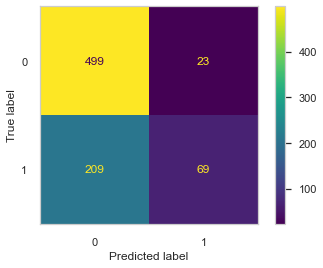

In [194]:
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(rs, X_test, y_test)

In [195]:
#rs.best_estimator_?

In [196]:
rs.cv_results_

{'mean_fit_time': array([0.047787  , 0.05312557, 0.02498503, 0.03749042, 0.04568777,
        0.05312457, 0.02500758, 0.02812133, 0.0266243 , 0.04860477,
        0.04658251, 0.05959735, 0.03569307, 0.0523035 , 0.02140851,
        0.04359951, 0.05009069, 0.04983239, 0.04926004, 0.033846  ,
        0.033883  , 0.03421135, 0.05942831, 0.03229518, 0.05115266,
        0.03370094, 0.06168919, 0.04591241, 0.04645886, 0.05980773]),
 'std_fit_time': array([0.00855335, 0.00765098, 0.00585413, 0.00765295, 0.00539313,
        0.00765141, 0.00765744, 0.00624626, 0.00921357, 0.00239418,
        0.00942358, 0.00581365, 0.0061451 , 0.00636102, 0.00808931,
        0.00481004, 0.00643759, 0.00593172, 0.00465182, 0.00703919,
        0.00366762, 0.0036347 , 0.01120895, 0.00128293, 0.00576728,
        0.00260143, 0.00266413, 0.00426903, 0.00641008, 0.00613592]),
 'mean_score_time': array([0.18001742, 0.20268331, 0.1595346 , 0.19386888, 0.17975793,
        0.19740067, 0.15349054, 0.15642786, 0.17242036, 0.17

In [197]:
pd.DataFrame(rs.cv_results_).columns
(pd.DataFrame(rs.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
 .sort_values(by='rank_test_score').head(10))

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_weights', 'param_p', 'param_n_neighbors', 'param_metric',
       'param_leaf_size', 'param_algorithm', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

params  mean_test_score  \
13  {'weights': 'distance', 'p': 1, 'n_neighbors':...         0.692812   
22  {'weights': 'distance', 'p': 2, 'n_neighbors':...         0.690312   
5   {'weights': 'distance', 'p': 1, 'n_neighbors':...         0.689688   
18  {'weights': 'distance', 'p': 1, 'n_neighbors':...         0.686250   
4   {'weights': 'uniform', 'p': 2, 'n_neighbors': ...         0.684375   
21  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...         0.684375   
25  {'weights': 'distance', 'p': 2, 'n_neighbors':...         0.683438   
24  {'weights': 'distance', 'p': 2, 'n_neighbors':...         0.683438   
12  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...         0.683437   
28  {'weights': 'uniform', 'p': 2, 'n_neighbors': ...         0.682813   

    rank_test_score  
13                1  
22                2  
5                 3  
18                4  
4                 5  
21                5  
25                7  
24                7  
12                9  
28               10

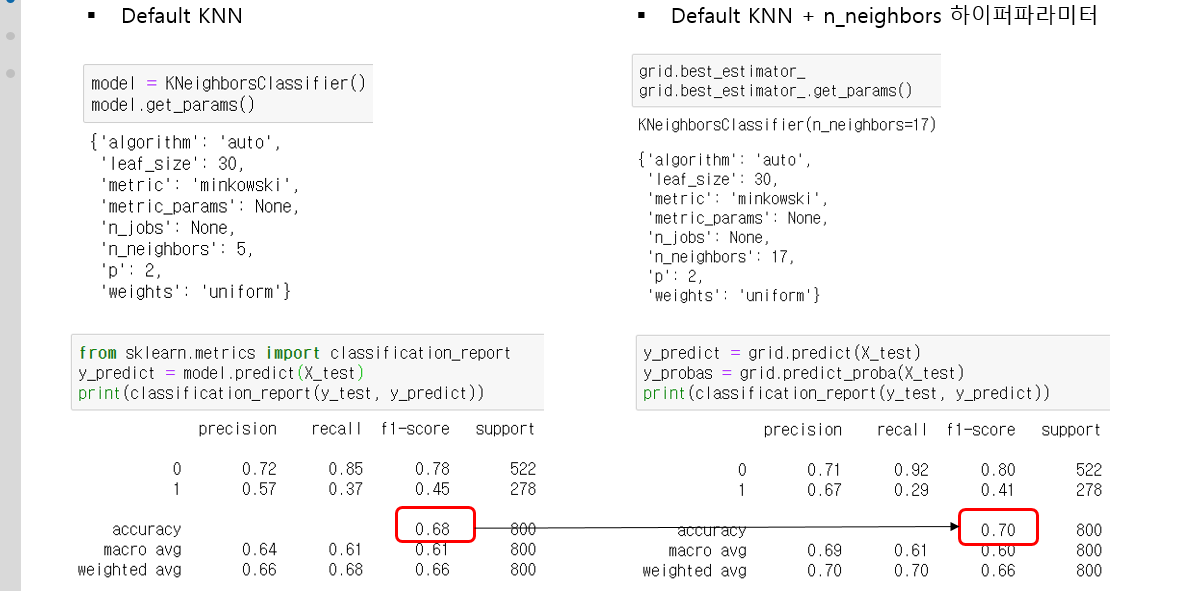

In [198]:
Image(filename='../img/knn-summary01.png', width=600, height=200)

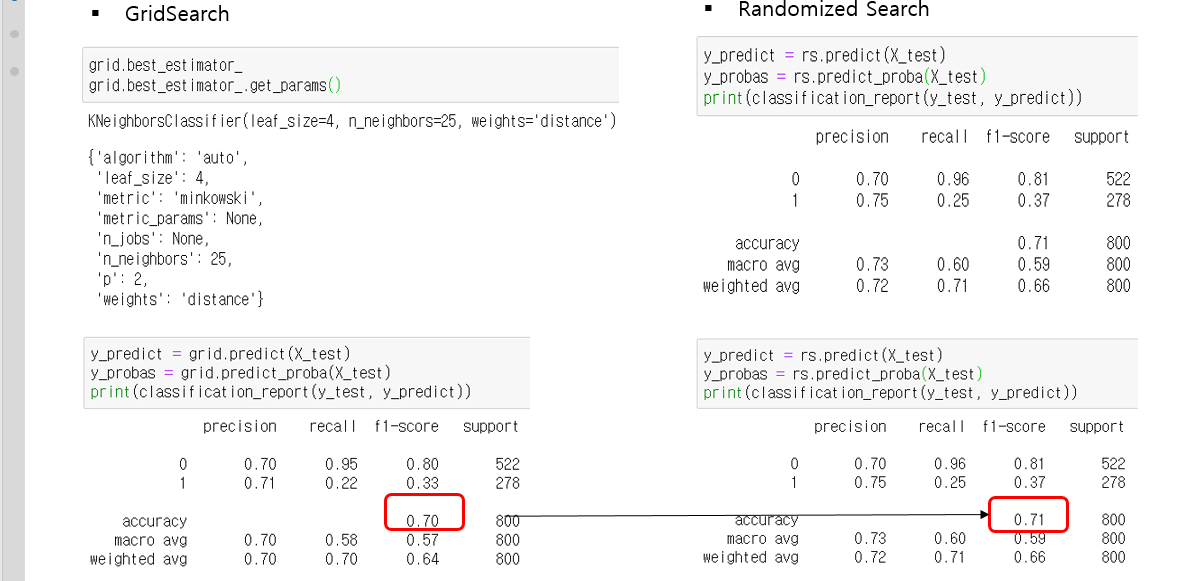

In [199]:
Image(filename='../img/knn-summary02.png', width=600, height=200)

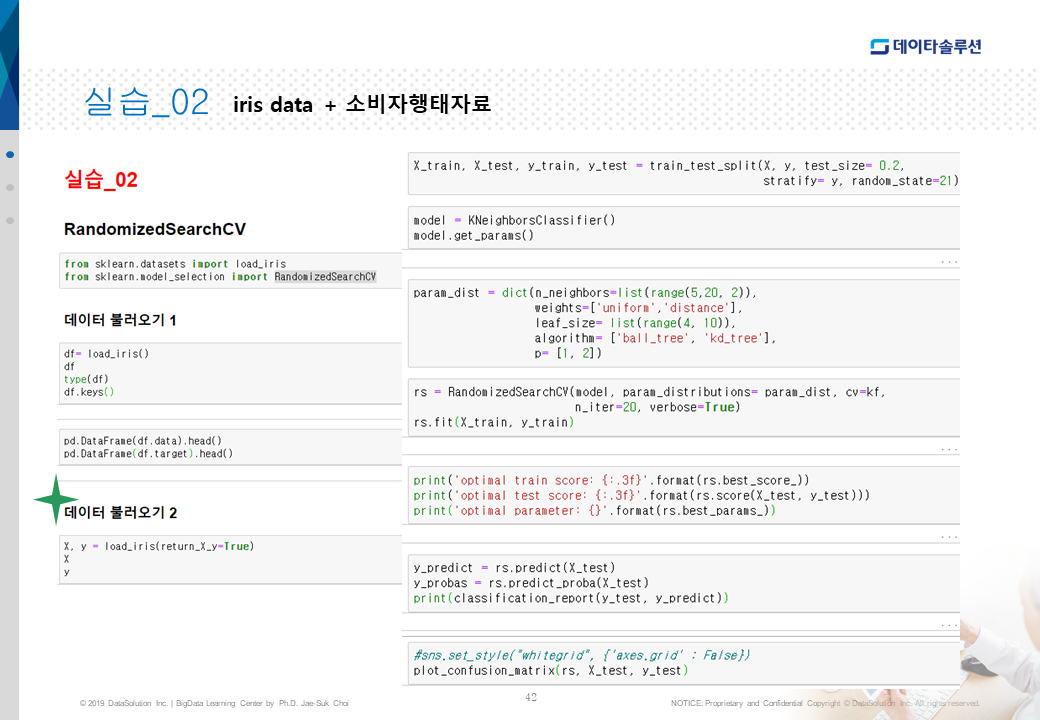

In [200]:
Image(filename='../img/슬라이드42.png', width=width, height=height)

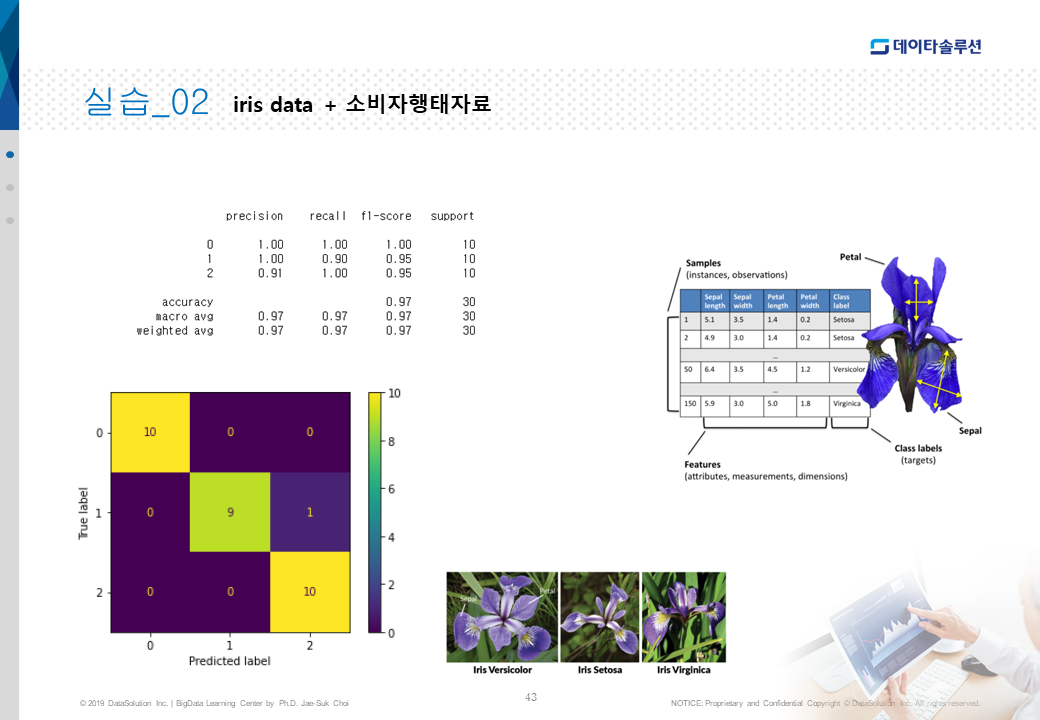

In [201]:
Image(filename='../img/슬라이드43.png', width=width, height=height)

## 예측결과의 무작위성

Text(0.5, 1.0, '100번(5겹 교차검증)의 예측에 따른 모델의 정확성')

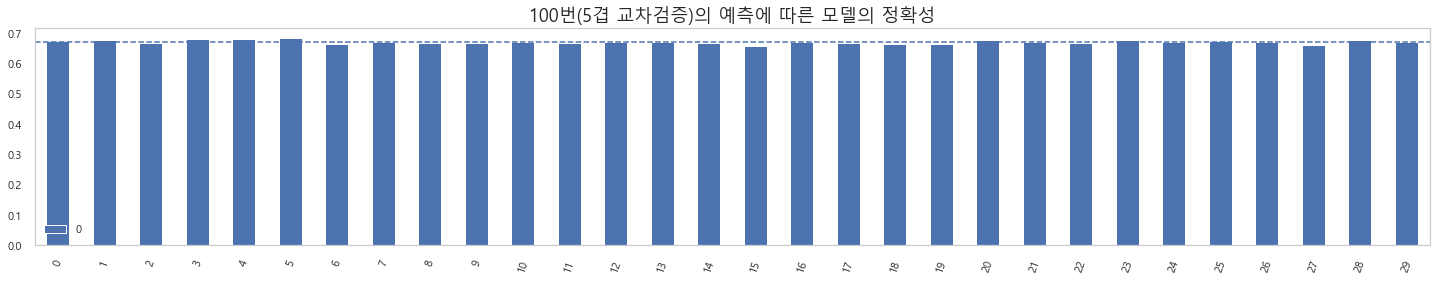

In [202]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
accuracy = []
for i in np.arange(0,30) :
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size= 0.2,                
                                                    stratify= y, random_state=i)
    accuracy.append(cross_val_score(KNeighborsClassifier(), X_tr, y_tr, cv=kf).mean())
    
pd.DataFrame(accuracy).plot(kind= 'bar', rot='70', figsize=(25,4))
plt.axhline(y= np.mean(accuracy), linestyle='--')
plt.title('100번(5겹 교차검증)의 예측에 따른 모델의 정확성', fontsize=18)

# 5. 각종 성능 지표 
## 수신자운영특성 곡선 (Receiver Operating Characteristic Curve, ROC)

In [203]:
y_predict = rs.predict(X_test)
y_probas = rs.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81       522
           1       0.75      0.25      0.37       278

    accuracy                           0.71       800
   macro avg       0.73      0.60      0.59       800
weighted avg       0.72      0.71      0.66       800



<Figure size 864x216 with 0 Axes>

(array([ 36., 162., 338., 526., 658., 736., 769., 784., 794., 800.]),
 array([0.04509976, 0.12591947, 0.20673918, 0.2875589 , 0.36837861,
        0.44919832, 0.53001804, 0.61083775, 0.69165746, 0.77247717,
        0.85329689]),
 <a list of 10 Patch objects>)

50% 이상의 확률 예측 자료는 92 개


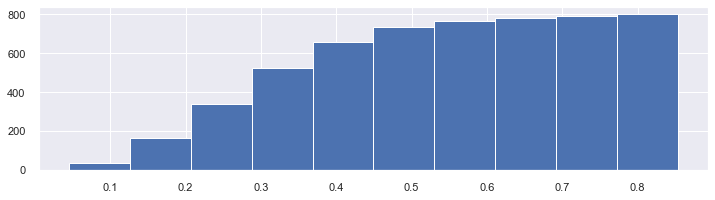

In [204]:
sns.set()
plt.figure(figsize=(12, 3))
plt.hist(y_probas[:, 1], cumulative=True)
print('50% 이상의 확률 예측 자료는 {} 개'.format(sum((y_probas[:, 1] >= 0.5)*1)))

비구매확률  구매확률  분류(y_predict)  실제(y_test)
0   0.68  0.32              0           1
1   0.61  0.39              0           0
2   0.33  0.67              1           0
3   0.59  0.41              0           0
4   0.85  0.15              0           0

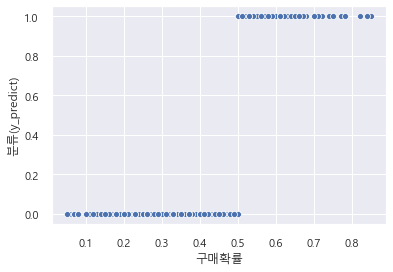

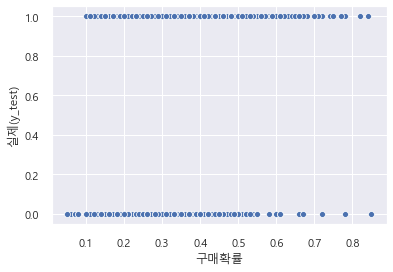

In [205]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
data = pd.DataFrame(y_probas, columns =['비구매확률', '구매확률']).round(2)
data['분류(y_predict)'] = y_predict
data['실제(y_test)'] = y_test.values
data.head()
sns.scatterplot(data=data, x='구매확률', y='분류(y_predict)');plt.show()
sns.scatterplot(data=data, x='구매확률', y='실제(y_test)')

(array([ 36., 126., 176., 188., 132.,  78.,  33.,  15.,  10.,   6.]),
 array([0.04509976, 0.12591947, 0.20673918, 0.2875589 , 0.36837861,
        0.44919832, 0.53001804, 0.61083775, 0.69165746, 0.77247717,
        0.85329689]),
 <a list of 10 Patch objects>)

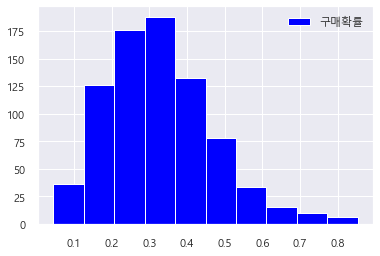

(array([  6.,  10.,  15.,  33.,  78., 132., 188., 176., 126.,  36.]),
 array([0.14670311, 0.22752283, 0.30834254, 0.38916225, 0.46998196,
        0.55080168, 0.63162139, 0.7124411 , 0.79326082, 0.87408053,
        0.95490024]),
 <a list of 10 Patch objects>)

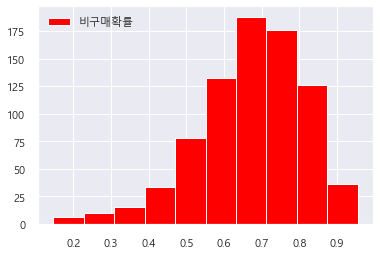

In [206]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

plt.hist(y_probas[:, 1], color ='blue', label='구매확률'); plt.legend(); plt.show()
plt.hist(y_probas[:, 0], color ='red', label='비구매확률'); plt.legend()

## Dummy Classifier

In [207]:
from sklearn.dummy import DummyClassifier 
dummy_clf = DummyClassifier(strategy='uniform', random_state=11) 
dummy_clf.fit(X_train, y_train) 
dummy_clf.score(X_test, y_test)

DummyClassifier(random_state=11, strategy='uniform')

0.49

In [208]:
dummy_predict = dummy_clf.predict(X_test) 
print(classification_report(y_test, dummy_predict)) 

              precision    recall  f1-score   support

           0       0.64      0.49      0.56       522
           1       0.34      0.49      0.40       278

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.48       800
weighted avg       0.54      0.49      0.50       800



In [209]:
rs.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=35, metric='manhattan',
                     n_neighbors=27, p=1, weights='distance')

(array([  0.,   0.,   0.,   0.,   0., 800.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

(array([ 36., 126., 176., 188., 132.,  78.,  33.,  15.,  10.,   6.]),
 array([0.04509976, 0.12591947, 0.20673918, 0.2875589 , 0.36837861,
        0.44919832, 0.53001804, 0.61083775, 0.69165746, 0.77247717,
        0.85329689]),
 <a list of 10 Patch objects>)

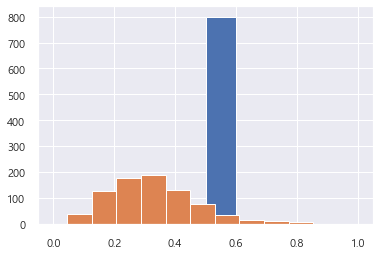

In [210]:
dummy_probas = dummy_clf. predict_proba(X_test) 
y_probas = rs.predict_proba(X_test) 
plt.hist(dummy_probas[:, 1]) 
plt.hist(y_probas[:, 1]) 

#### Dummy와 KNN 모델을 차별화하는 성능 지표는 무엇인가? 분류임계값에 따라 Dummy와 KNN 모델의 허위양성율(FPR=FP/(FP+FP)과 참양성율(TPR=TP/(TP+FN)을 살펴보면 성능지표에 대한 힌트를 얻을 수 있다.

In [211]:
from sklearn.metrics import confusion_matrix
y_scores = y_probas[:, 1]

def adjusted_classes(y_scores, t): 
    return [1 if y >= t else 0 for y in y_scores] 
 
def precision_recall_threshold(p, r, t): 
    y_pred_adj = adjusted_classes(y_scores, t) 
    cf = confusion_matrix(y_test, y_pred_adj)
    cut_off = t
    fpr = round(cf[0,1]/(cf[0,0]+cf[0,1])*100, 2)
    tpr = round(cf[1,1]/(cf[1,0]+cf[1,1])*100, 2)
    pos_predict = cf[0,1]+cf[1,1]
    summary = [cut_off, tpr, fpr, pos_predict]
    return summary

In [212]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

total_summary =[]
for threshold in np.linspace(0.1, 0.7, 100, endpoint=False) :
    total_summary.append(precision_recall_threshold(p, r, threshold))
data = pd.DataFrame(total_summary, columns = ['분류임계값(t)', '재현율(TPR)', 
                                        '허위양성율(FPR)', '구매판정수(y_pred=1)'])
data

분류임계값(t)  재현율(TPR)  허위양성율(FPR)  구매판정수(y_pred=1)
0      0.100    100.00       97.13              785
1      0.106     99.64       96.36              780
2      0.112     98.92       95.21              772
3      0.118     98.56       94.64              768
4      0.124     98.56       94.25              766
..       ...       ...         ...              ...
95     0.670      5.40        0.77               19
96     0.676      5.04        0.57               17
97     0.682      5.04        0.57               17
98     0.688      4.68        0.57               16
99     0.694      4.68        0.57               16

[100 rows x 4 columns]

- X와 y축은 각각 허위양성률(FPR)과 참양성율(TPR)이다. 분류임계값이 ‘0’이면 모든 데이터를 ‘1’로 판단하기 때문에 TPR과 FPR은 모두 ‘1’이다. 
- 분류임계값을 ‘1’에서 ‘0’으로 감소시키면서 해당하는 TPR과 FPR을 그리면 우상향의 수신자운영특성 곡선(Receiver Operating Characteristic Curve, ROC)이 된다.

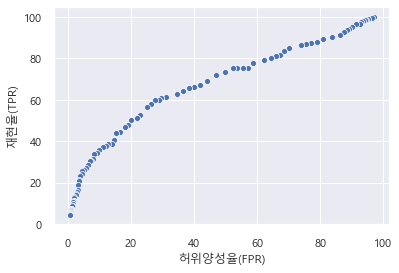

In [213]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
sns.scatterplot(x='허위양성율(FPR)', y='재현율(TPR)', data=data)

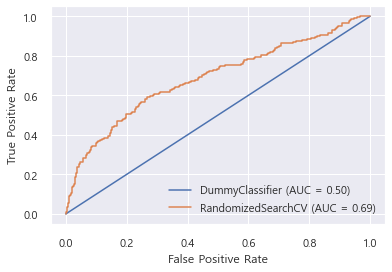

In [214]:
from sklearn.metrics import plot_roc_curve 
dummy_disp = plot_roc_curve(dummy_clf, X_test, y_test) 
knn_disp = plot_roc_curve(rs, X_test, y_test, ax=dummy_disp.ax_) 

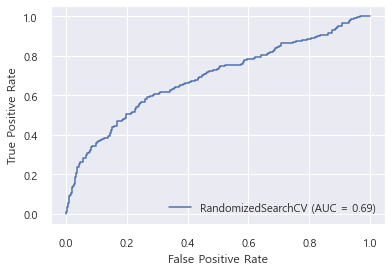

In [215]:
from sklearn.metrics import plot_roc_curve 
plot_roc_curve(rs, X_test, y_test)

In [216]:
from sklearn.metrics import RocCurveDisplay, roc_curve
clf = rs.best_estimator_
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])

In [217]:
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])

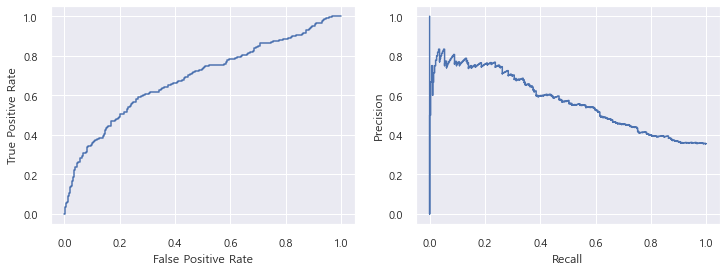

In [218]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax1)
PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax=ax2)

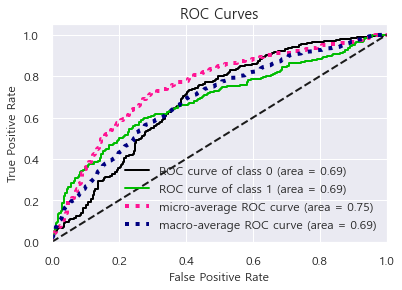

In [219]:
#! pip install scikit-plot
import scikitplot as skplt # $ pip install scikit-plot
skplt.metrics.plot_roc(y_test, y_probas)

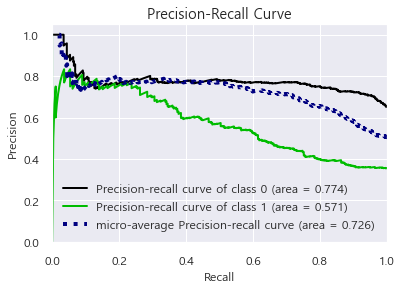

In [220]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

In [221]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_probas[:, 1])
pd.DataFrame(np.vstack([p, r]), index=['정밀도', '재현율']).round(2)
pd.DataFrame(thresholds,columns=['분류임계값']).T.round(2)

0     1     2     3     4     5     6     7     8     9    ...   773  \
정밀도  0.36  0.35  0.36  0.36  0.36  0.36  0.36  0.36  0.36  0.36  ...  0.78   
재현율  1.00  1.00  1.00  1.00  1.00  1.00  1.00  0.99  0.99  0.99  ...  0.03   

      774   775   776   777   778   779  780  781  782  
정밀도  0.75  0.71  0.67  0.60  0.75  0.67  0.5  0.0  1.0  
재현율  0.02  0.02  0.01  0.01  0.01  0.01  0.0  0.0  0.0  

[2 rows x 783 columns]

0    1     2     3     4     5     6     7     8     9    ...   772  \
분류임계값  0.1  0.1  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  ...  0.75   

        773   774   775   776   777   778   779   780   781  
분류임계값  0.77  0.77  0.77  0.78  0.78  0.78  0.82  0.84  0.85  

[1 rows x 782 columns]

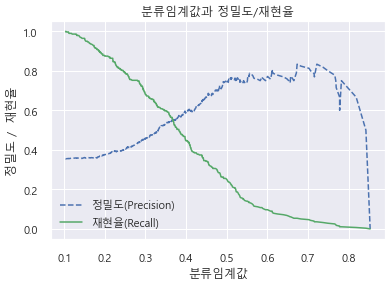

In [222]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.title('분류임계값과 정밀도/재현율') 
    plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도(Precision)') # 판사
    plt.plot(thresholds, recalls[:-1], 'g-', label='재현율(Recall)') # 검사
    plt.ylabel('정밀도 /  재현율') 
    plt.xlabel('분류임계값') 
    plt.legend(loc='best') 
    
plot_precision_recall_vs_threshold(p, r, thresholds)

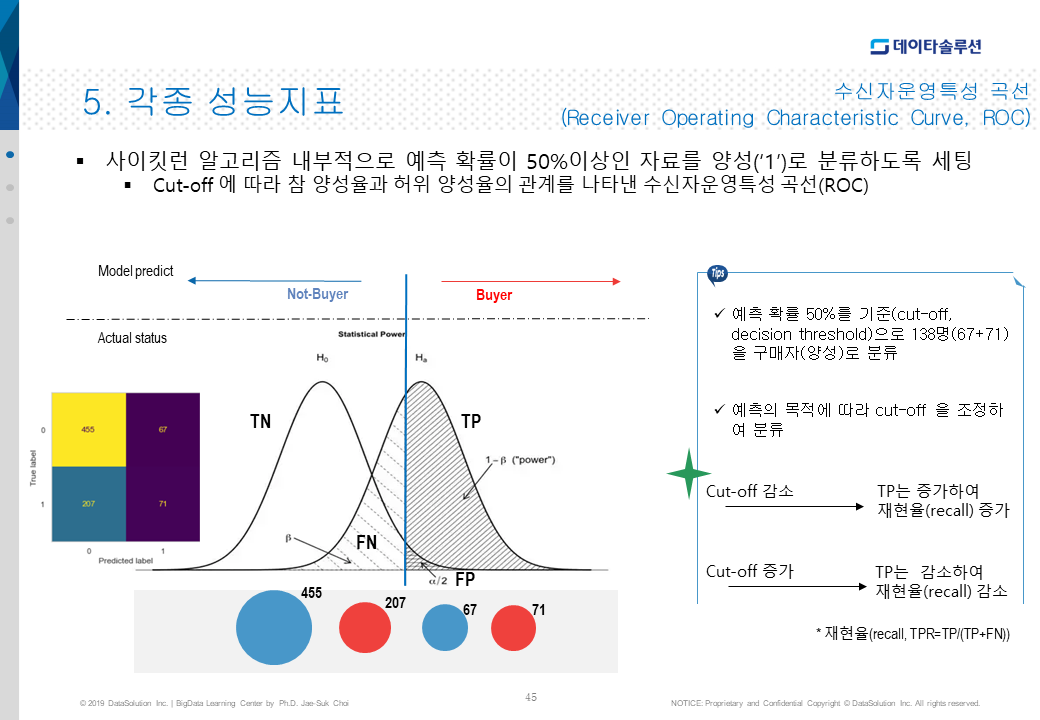

In [223]:
Image(filename='../img/슬라이드45.png', width=width, height=height)

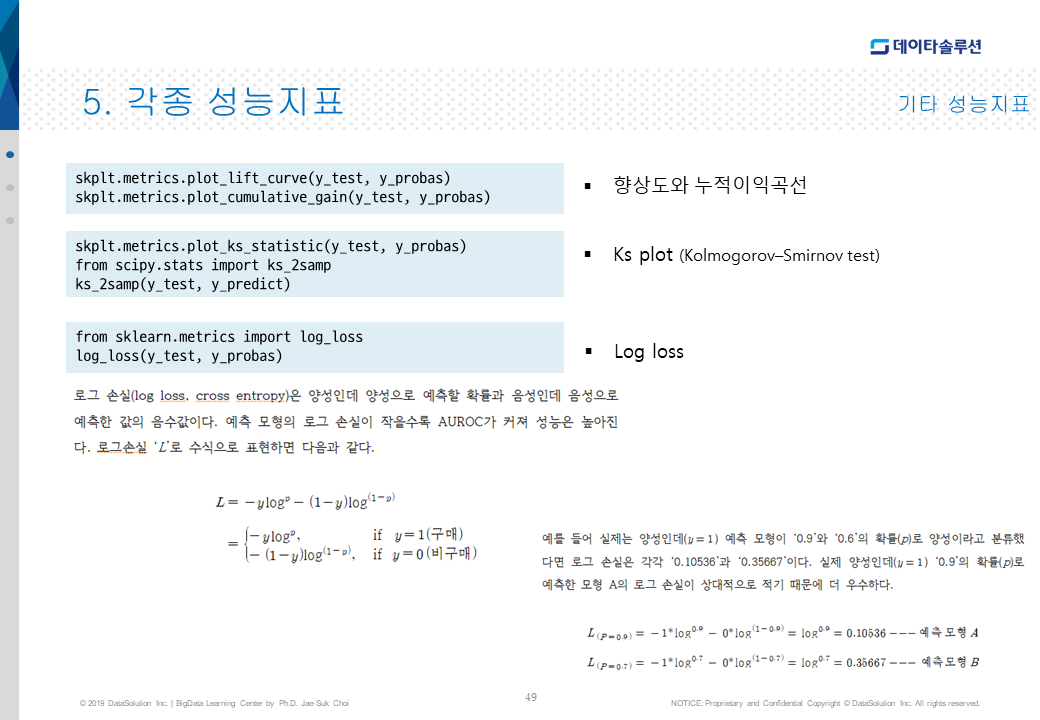

In [224]:
Image(filename='../img/슬라이드49.png', width=width, height=height)

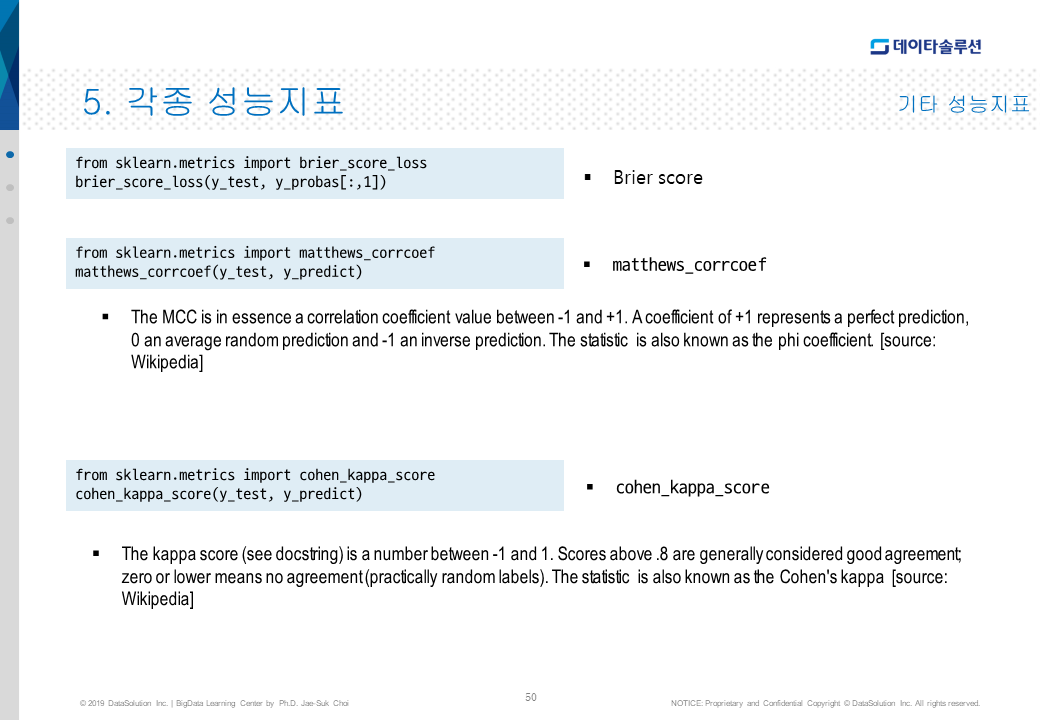

In [225]:
Image(filename='../img/슬라이드50.png', width=width, height=height)

## Th other metrics and scoring: quantifying the quality of predictions

□ 향상도와 누적이익 곡선

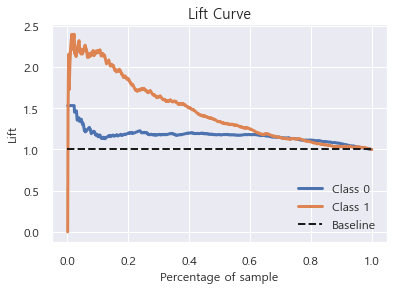

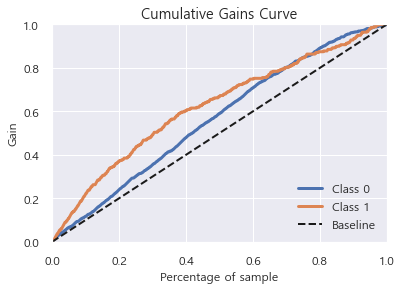

In [226]:
skplt.metrics.plot_lift_curve(y_test, y_probas)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)

## Log loss

In [227]:
from sklearn.metrics import log_loss
log_loss(y_test, y_probas)

0.5947269249677006

## Brier score

In [228]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_probas[:,1])
brier_score_loss(y_test, np.zeros(800)+0.5)
brier_score_loss(y_test, np.ones(800))
brier_score_loss(y_test, np.zeros(800))

0.2026325058558866

0.25

0.6525

0.3475

The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. 

In [229]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_predict)

0.3047021418736011

The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

In [230]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_predict)

0.24197869698751884

- 모델이 얼마나 잘 분류하였나를 보여주기 위해 ‘0’부터 ‘1’까지의 분류임계값의 아래에 해당하는 데이터의 누적비율을 그래프로 나타낸다.
- KS(Kolmogorov–Smirnov) 통계량은 실제와 예측 두 개의 데이터가 같은 분포인지 확인하는 비모수 통계량(모수 통계량의 카이제곱 검정과 같은 기능)이다. 

KstestResult(statistic=0.2325, pvalue=2.2858795566626183e-19)

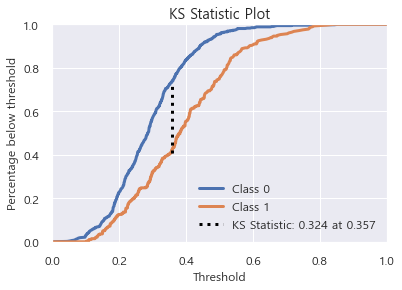

In [231]:
skplt.metrics.plot_ks_statistic(y_test, y_probas)
from scipy.stats import ks_2samp
ks_2samp(y_test, y_predict)

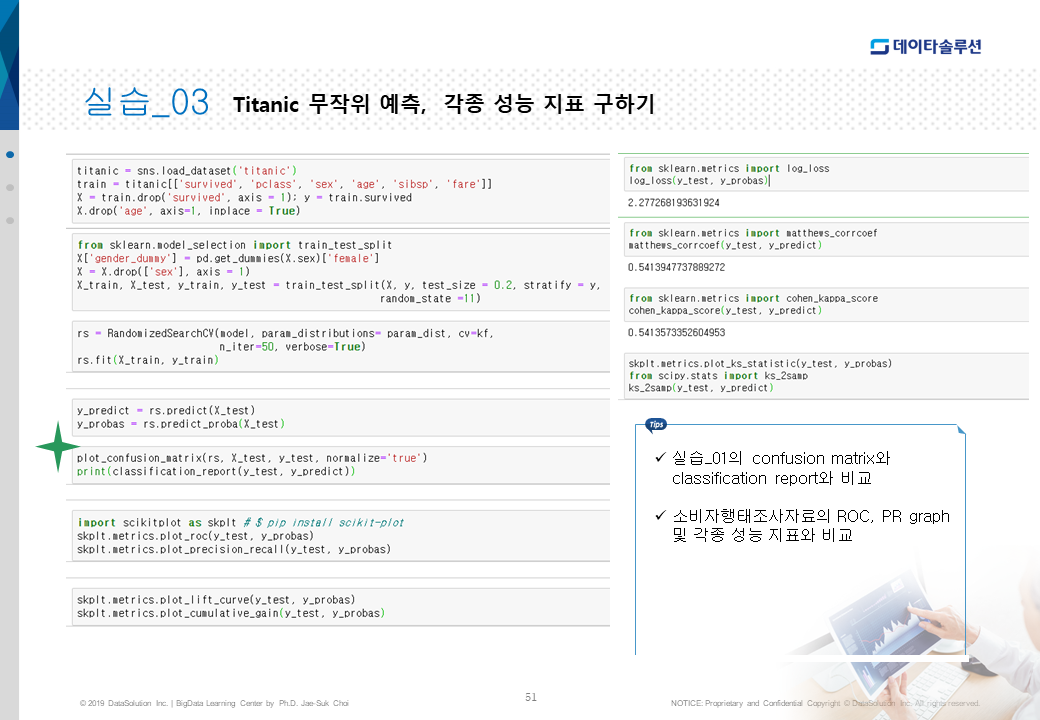

In [232]:
Image(filename='../img/슬라이드51.png', width=width, height=height)

DiscriminationThreshold(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000233626715E0>,
                        force_model=None, model=None)

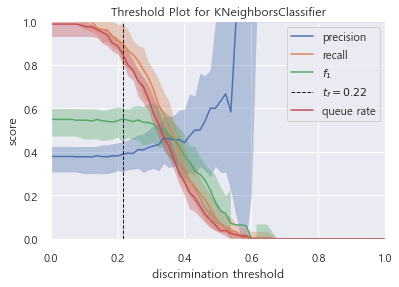

In [233]:
#! pip install yellowbrick
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(rs.best_estimator_)
visualizer.fit(X_test, y_test)
visualizer.poof()

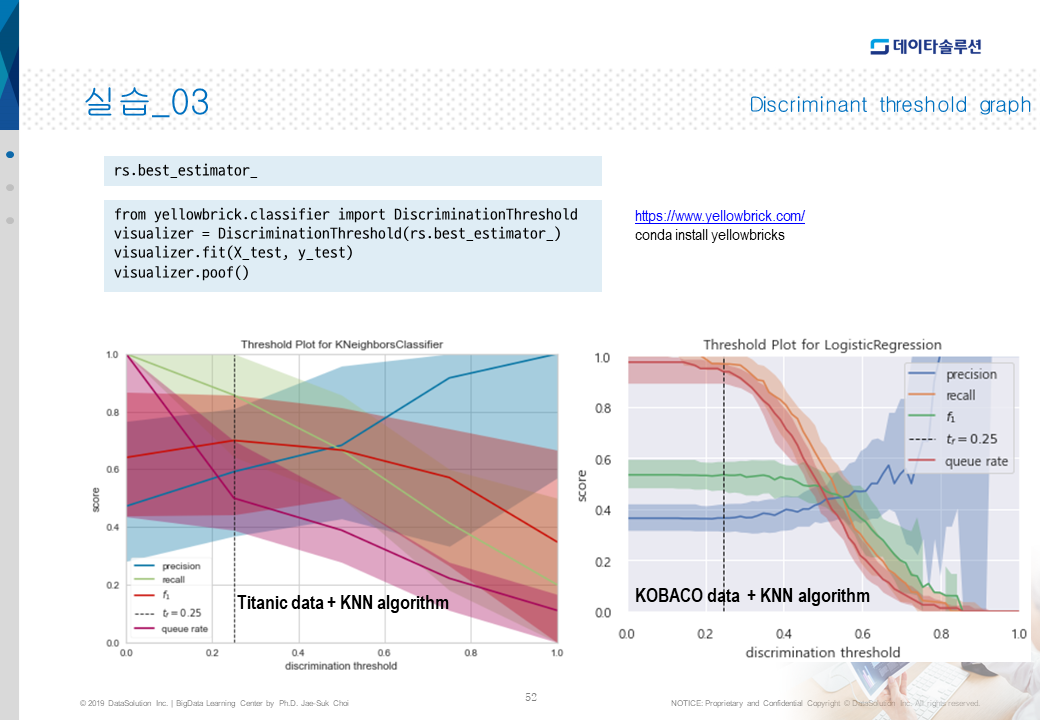

In [107]:
Image(filename='../img/슬라이드52.png', width=width, height=height)

# 6. pipeline

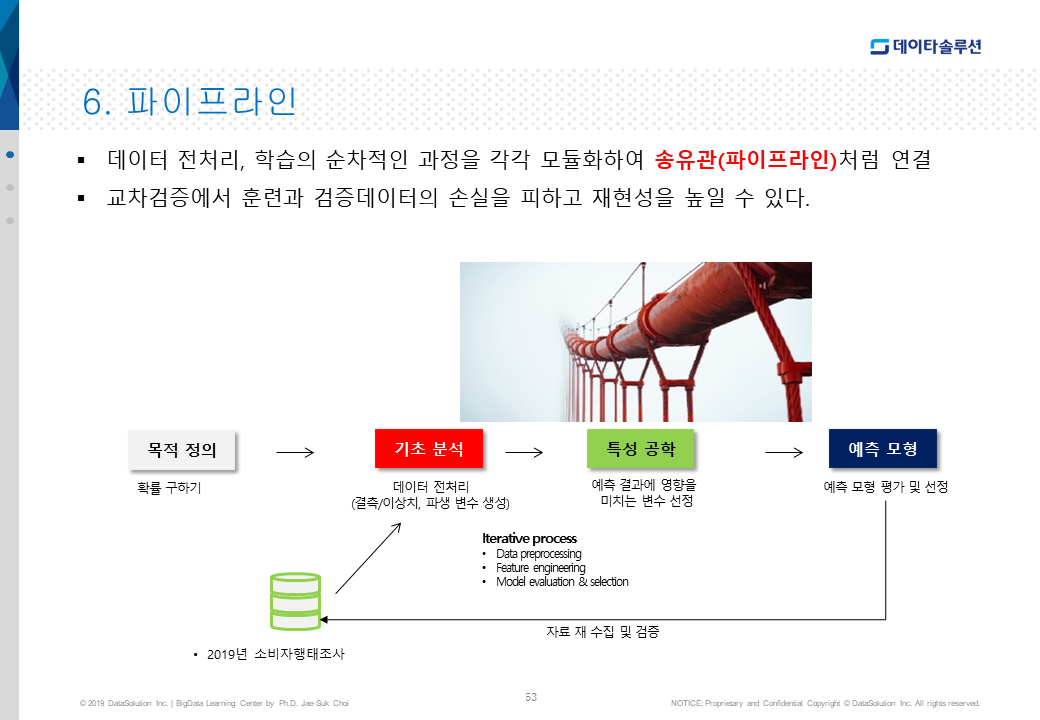

In [234]:
Image(filename='../img/슬라이드53.png', width=width, height=height)

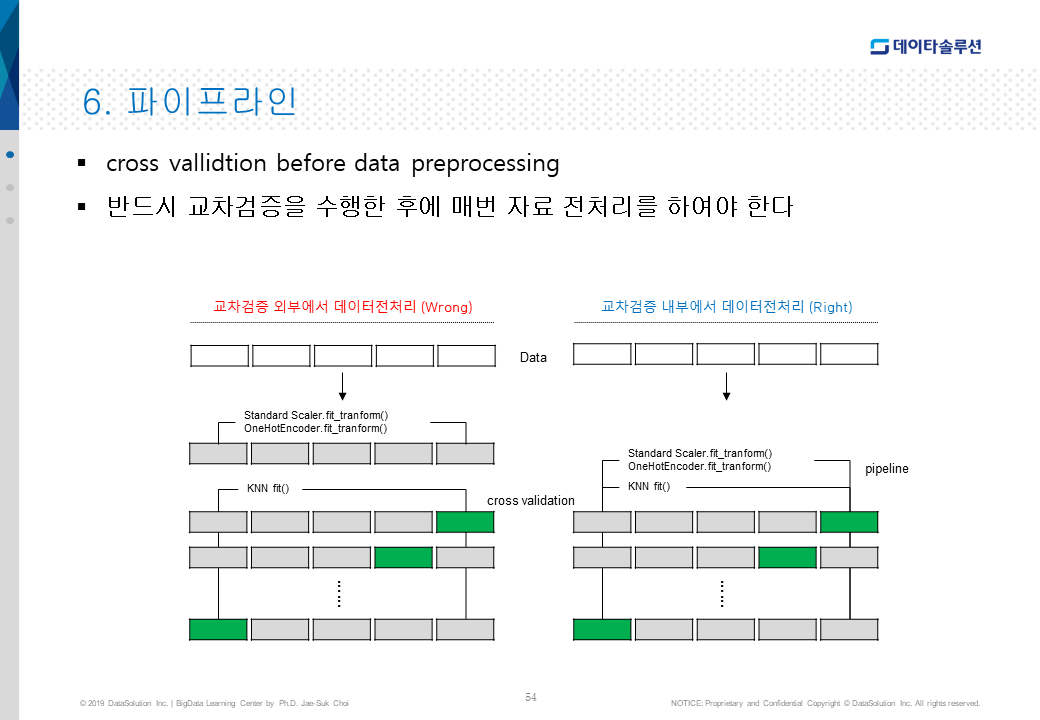

In [235]:
Image(filename='../img/슬라이드54.png', width=width, height=height)

## 특성변수 추출과 로지스틱 알고리즘 파이프 라인

In [236]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=25, step=20)
model = LogisticRegression()

In [237]:
def Wrapper_RFE(X, y):
    rfe_selector = RFE(estimator=LogisticRegression(),
                        n_features_to_select=25, step=20)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    
    return rfe_support, rfe_feature

rfe_support, rfe_feature = Wrapper_RFE(X, y)
','.join(rfe_feature)
''.join(str(rfe_support))

'성별_1,지역_2,지역_5,지역_6,지역_7,직업_6,직업_7,최종학력_1.0,최종학력_2.0,최종학력_5.0,최종학력_6.0,최종학력_7.0,주거형태_3,결혼여부_3,TV_genre_4,TV_genre_7,TV_genre_9,TV_genre_15,TV_genre_17,드라마_genre_3,드라마_genre_9,드라마_genre_10,드라마_genre_11,드라마_genre_12,드라마_genre_15'

'[ True False False  True False False  True  True  True False False False\n False False  True  True  True  True False False False False False  True\n False  True False  True False False  True False False False False  True\n False False False False False False False False False False False False\n  True False False  True False  True False False False False False  True\n False  True False False  True False False False False False  True  True\n  True  True False False  True False]'

In [238]:
from sklearn.pipeline import Pipeline
clf = Pipeline(steps=[('rfe_sdelector', rfe_selector),
                      ('classifier', model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [239]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('rfe_sdelector',
                 RFE(estimator=LogisticRegression(), n_features_to_select=25,
                     step=20)),
                ('classifier', LogisticRegression())])

model score: 0.659


## 5. 최적 모델 저장(model persistency)

In [240]:
from joblib import dump, load
dump(rs.best_estimator_, '../output/knn.joblib')
model = load('../output/knn.joblib')
model

['../output/knn.joblib']

KNeighborsClassifier(algorithm='kd_tree', leaf_size=35, metric='manhattan',
                     n_neighbors=27, p=1, weights='distance')

In [241]:
# 데이터 저장
X.to_pickle('../data/X.pkl')
y.to_pickle('../data/y.pkl')

## Extra 실습 for pipeline

## sklearn.compose.ColumnTransformer
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

## Column Transformer with Mixed Types
https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [117]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
categorical_features = ['embarked', 'sex', 'pclass']
numeric_features = ['age', 'fare']

In [118]:
X

pclass                                             name     sex  \
0        1.0                    Allen, Miss. Elisabeth Walton  female   
1        1.0                   Allison, Master. Hudson Trevor    male   
2        1.0                     Allison, Miss. Helen Loraine  female   
3        1.0             Allison, Mr. Hudson Joshua Creighton    male   
4        1.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...      ...                                              ...     ...   
1304     3.0                             Zabour, Miss. Hileni  female   
1305     3.0                            Zabour, Miss. Thamine  female   
1306     3.0                        Zakarian, Mr. Mapriededer    male   
1307     3.0                              Zakarian, Mr. Ortin    male   
1308     3.0                               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0     29.0000    0.0    0.0   24160  211.3375       B5        S     2    NaN   
1      0.9167    1.0    2.0  113781  151.5500  C22 C26        S    11    NaN   
2      2.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
3     30.0000    1.0    2.0  113781  151.5500  C22 C26        S  None  135.0   
4     25.0000    1.0    2.0  113781  151.5500  C22 C26        S  None    NaN   
...       ...    ...    ...     ...       ...      ...      ...   ...    ...   
1304  14.5000    1.0    0.0    2665   14.4542     None        C  None  328.0   
1305      NaN    1.0    0.0    2665   14.4542     None        C  None    NaN   
1306  26.5000    0.0    0.0    2656    7.2250     None        C  None  304.0   
1307  27.0000    0.0    0.0    2670    7.2250     None        C  None    NaN   
1308  29.0000    0.0    0.0  315082    7.8750     None        S  None    NaN   

                            home.dest  
0                        St Louis, MO  
1     Montreal, PQ / Chesterville, ON  
2     Montreal, PQ / Chesterville, ON  
3     Montreal, PQ / Chesterville, ON  
4     Montreal, PQ / Chesterville, ON  
...                               ...  
1304                             None  
1305                             None  
1306                             None  
1307                             None  
1308                             None  

[1309 rows x 13 columns]

In [119]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [120]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
pd.DataFrame(clf.fit_transform(X_train))

0         1    2    3    4    5    6    7    8    9   10
0    -0.119601 -0.498731  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0
1    -0.119601 -0.495889  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
2     0.730496 -0.495320  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
3    -0.506008 -0.356513  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0
4    -0.196882 -0.379661  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
...        ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
1042 -0.583290 -0.508478  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1043 -0.119601 -0.508478  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1044 -1.587950 -0.249706  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1045  0.266807 -0.498244  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
1046 -0.119601 -0.498731  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0

[1047 rows x 11 columns]

In [122]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

model score: 0.775


In [123]:
from sklearn import set_config
set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

## End